<a href="https://colab.research.google.com/github/luisfelipebp/regressao-housing/blob/main/regressao_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Preços de Casas na Califórnia**

**Fonte dos Dados:** [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

Este projeto utiliza um conjunto de dados contendo informações sobre casas em diversos distritos da Califórnia, baseadas nos dados do censo de 1990. O objetivo é explorar as características dessas residências e como elas se relacionam com seus valores.

**Descrição das Features:**

*   **longitude:** Posição longitudinal da casa (quanto maior, mais a oeste).
*   **latitude:** Posição latitudinal da casa (quanto maior, mais ao norte).
*   **housingMedianAge:** Idade média das casas em um quarteirão (em anos).
*   **totalRooms:** Número total de cômodos em um quarteirão.
*   **totalBedrooms:** Número total de quartos em um quarteirão.
*   **population:** População total em um quarteirão.
*   **households:** Número total de famílias em um quarteirão.
*   **medianIncome:** Renda média das famílias em um quarteirão (em dezenas de milhares de dólares americanos).
*   **medianHouseValue:** Valor médio das casas em um quarteirão (em dólares americanos).
*   **oceanProximity:** Proximidade da casa em relação ao oceano.

[Resultados Finais](#scrollTo=B8DfOXAEaZyU)

# Importaçao


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data-Science/Datasets/Regressão/housing.csv', sep=',',encoding='utf-8')

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
median_bedrooms = df['total_bedrooms'].median()

In [ ]:
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
df.total_bedrooms.describe()

count    20640.000000
mean       536.838857
std        419.391878
min          1.000000
25%        297.000000
50%        435.000000
75%        643.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# Tratamento dos dados

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
coluna_categorica = 'ocean_proximity'

In [ ]:
col_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), [coluna_categorica])
    ],
    remainder='passthrough'
)

In [ ]:
array_transformer = col_transformer.fit_transform(df)

In [ ]:
df2 = pd.DataFrame(array_transformer, columns=col_transformer.get_feature_names_out())

In [ ]:
df2.head()

cat__ocean_proximity_<1H OCEAN  cat__ocean_proximity_INLAND  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   

   cat__ocean_proximity_ISLAND  cat__ocean_proximity_NEAR BAY  \
0                          0.0                            1.0   
1                          0.0                            1.0   
2                          0.0                            1.0   
3                          0.0                            1.0   
4                          0.0                            1.0   

   cat__ocean_proximity_NEAR OCEAN  remainder__longitude  remainder__latitude  \
0                              0.0               -122.23                37.88   
1                              0.0               -122.22                37.86   
2                              0.0               -122.24                37.85   
3                              0.0               -122.25                37.85   
4                              0.0               -122.25                37.85   

   remainder__housing_median_age  remainder__total_rooms  \
0                           41.0                   880.0   
1                           21.0                  7099.0   
2                           52.0                  1467.0   
3                           52.0                  1274.0   
4                           52.0                  1627.0   

   remainder__total_bedrooms  remainder__population  remainder__households  \
0                      129.0                  322.0                  126.0   
1                     1106.0                 2401.0                 1138.0   
2                      190.0                  496.0                  177.0   
3                      235.0                  558.0                  219.0   
4                      280.0                  565.0                  259.0   

   remainder__median_income  remainder__median_house_value  
0                    8.3252                       452600.0  
1                    8.3014                       358500.0  
2                    7.2574                       352100.0  
3                    5.6431                       341300.0  
4                    3.8462                       342200.0

In [ ]:
df_rename = {
    'remainder__longitude': 'longitude',
    'remainder__latitude': 'latitude',
    'remainder__housing_median_age': 'housing_median_age',
    'remainder__total_rooms': 'total_rooms',
    'remainder__total_bedrooms': 'total_bedrooms',
    'remainder__population': 'population',
    'remainder__households': 'households',
    'remainder__median_income': 'median_income',
    'remainder__median_house_value': 'median_house_value',
    'cat__ocean_proximity_<1H OCEAN': 'ONEH_OCEAN',
    'cat__ocean_proximity_INLAND': 'INLAND',
    'cat__ocean_proximity_NEAR OCEAN': 'NEAR_OCEAN',
    'cat__ocean_proximity_NEAR BAY': 'NEAR_BAY',
    'cat__ocean_proximity_ISLAND': 'ISLAND'
}

df2.rename(columns=df_rename, inplace=True)

In [ ]:
df2.head()

ONEH_OCEAN  INLAND  ISLAND  NEAR_BAY  NEAR_OCEAN  longitude  latitude  \
0         0.0     0.0     0.0       1.0         0.0    -122.23     37.88   
1         0.0     0.0     0.0       1.0         0.0    -122.22     37.86   
2         0.0     0.0     0.0       1.0         0.0    -122.24     37.85   
3         0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
4         0.0     0.0     0.0       1.0         0.0    -122.25     37.85   

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   
2                52.0       1467.0           190.0       496.0       177.0   
3                52.0       1274.0           235.0       558.0       219.0   
4                52.0       1627.0           280.0       565.0       259.0   

   median_income  median_house_value  
0         8.3252            452600.0  
1         8.3014            358500.0  
2         7.2574            352100.0  
3         5.6431            341300.0  
4         3.8462            342200.0

In [ ]:
provisores = df2.iloc[:,0:13].values

In [ ]:
alvo = df2.iloc[:,13].values

# Gráficos

In [ ]:
import plotly.express as px
import seaborn as sns

In [ ]:
boxplot = px.box(df, y="longitude")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="housing_median_age")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="latitude")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="population")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="households")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="median_income")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="median_house_value")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="total_bedrooms")
boxplot.show()

In [ ]:
hist =  px.histogram (df,  x = "total_bedrooms", nbins=60)
hist.update_layout(width=800,height=500,title_text='Média dos valores')
hist.show()

In [ ]:
boxplot = px.box(df, y="total_rooms")
boxplot.show()

In [ ]:
hist =  px.histogram (df,  x = "total_rooms", nbins=60)
hist.update_layout(width=800,height=500,title_text='Média dos valores')
hist.show()

# Aplicação de Transformação Logarítmica

Devido à presença de outliers e à forte assimetria à direita observadas nas variáveis `total_rooms`, `total_bedrooms`, `total_houlseholds`,`total_population`, `median_income`,`median_house_value` **aplicaremos uma transformação logarítmica** a essas colunas para melhor representação e análise.

In [ ]:
df_log = pd.DataFrame.copy(df2)

In [ ]:
df_log

ONEH_OCEAN  INLAND  ISLAND  NEAR_BAY  NEAR_OCEAN  longitude  latitude  \
0             0.0     0.0     0.0       1.0         0.0    -122.23     37.88   
1             0.0     0.0     0.0       1.0         0.0    -122.22     37.86   
2             0.0     0.0     0.0       1.0         0.0    -122.24     37.85   
3             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
4             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
...           ...     ...     ...       ...         ...        ...       ...   
20635         0.0     1.0     0.0       0.0         0.0    -121.09     39.48   
20636         0.0     1.0     0.0       0.0         0.0    -121.21     39.49   
20637         0.0     1.0     0.0       0.0         0.0    -121.22     39.43   
20638         0.0     1.0     0.0       0.0         0.0    -121.32     39.43   
20639         0.0     1.0     0.0       0.0         0.0    -121.24     39.37   

       housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value  
0           126.0         8.3252            452600.0  
1          1138.0         8.3014            358500.0  
2           177.0         7.2574            352100.0  
3           219.0         5.6431            341300.0  
4           259.0         3.8462            342200.0  
...           ...            ...                 ...  
20635       330.0         1.5603             78100.0  
20636       114.0         2.5568             77100.0  
20637       433.0         1.7000             92300.0  
20638       349.0         1.8672             84700.0  
20639       530.0         2.3886             89400.0  

[20640 rows x 14 columns]

In [ ]:
df_log['total_bedrooms_log'] = np.log(df_log['total_bedrooms'])
df_log['total_rooms_log'] = np.log(df_log['total_rooms'])
df_log['households_log'] = np.log(df_log['households'])
df_log['population_log'] = np.log(df_log['population'])
df_log['median_income_log'] = np.log(df_log['median_income'])
df_log['median_house_value_log'] = np.log(df_log['median_house_value'])

In [ ]:
df_log.drop(['total_bedrooms', 'total_rooms','households','population','median_income','median_house_value'], axis=1, inplace=True)

In [ ]:
df_log

ONEH_OCEAN  INLAND  ISLAND  NEAR_BAY  NEAR_OCEAN  longitude  latitude  \
0             0.0     0.0     0.0       1.0         0.0    -122.23     37.88   
1             0.0     0.0     0.0       1.0         0.0    -122.22     37.86   
2             0.0     0.0     0.0       1.0         0.0    -122.24     37.85   
3             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
4             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
...           ...     ...     ...       ...         ...        ...       ...   
20635         0.0     1.0     0.0       0.0         0.0    -121.09     39.48   
20636         0.0     1.0     0.0       0.0         0.0    -121.21     39.49   
20637         0.0     1.0     0.0       0.0         0.0    -121.22     39.43   
20638         0.0     1.0     0.0       0.0         0.0    -121.32     39.43   
20639         0.0     1.0     0.0       0.0         0.0    -121.24     39.37   

       housing_median_age  total_bedrooms_log  total_rooms_log  \
0                    41.0            4.859812         6.779922   
1                    21.0            7.008505         8.867709   
2                    52.0            5.247024         7.290975   
3                    52.0            5.459586         7.149917   
4                    52.0            5.634790         7.394493   
...                   ...                 ...              ...   
20635                25.0            5.924256         7.417580   
20636                18.0            5.010635         6.546785   
20637                17.0            6.184149         7.720462   
20638                18.0            6.013715         7.528332   
20639                16.0            6.423247         7.932003   

       households_log  population_log  median_income_log  \
0            4.836282        5.774552           2.119287   
1            7.037028        7.783641           2.116424   
2            5.176150        6.206576           1.982022   
3            5.389072        6.324359           1.730434   
4            5.556828        6.336826           1.347086   
...               ...             ...                ...   
20635        5.799093        6.739337           0.444878   
20636        4.736198        5.874931           0.938756   
20637        6.070738        6.914731           0.530628   
20638        5.855072        6.608001           0.624440   
20639        6.272877        7.234898           0.870707   

       median_house_value_log  
0                   13.022764  
1                   12.789684  
2                   12.771671  
3                   12.740517  
4                   12.743151  
...                       ...  
20635               11.265745  
20636               11.252859  
20637               11.432799  
20638               11.346871  
20639               11.400876  

[20640 rows x 14 columns]

# Correlação linear

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [ ]:
plt.scatter(df.longitude, df.median_house_value)
plt.title('Correlação Linear: Longitude vs Valor Médio')
plt.xlabel('Longitude')
plt.ylabel('Valor Médio')
plt.grid(False)
plt.show()

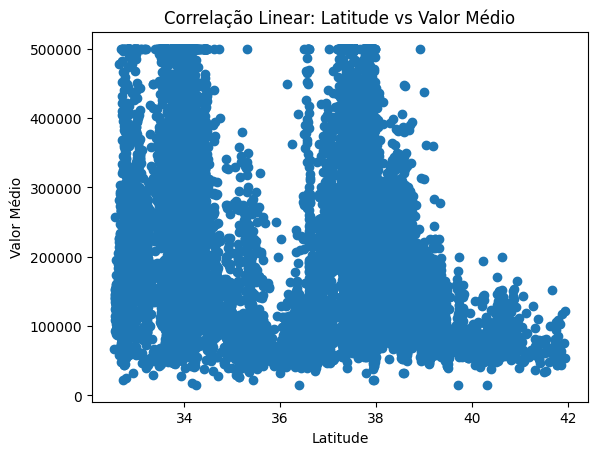

In [ ]:
plt.scatter(df.latitude, df.median_house_value)
plt.title('Correlação Linear: Latitude vs Valor Médio')
plt.xlabel('Latitude')
plt.ylabel('Valor Médio')
plt.grid(False)
plt.show()

In [ ]:
plt.scatter(df.housing_median_age, df.median_house_value)
plt.title('Correlação Linear: Idade Média das Casas vs Valor Médio')
plt.xlabel('Idade Média das Casas')
plt.ylabel('Valor Médio')
plt.grid(False)
plt.show()

In [ ]:
plt.scatter(df.total_rooms, df.median_house_value)
plt.title('Correlação Linear: Total de Cômodos vs Valor Médio')
plt.xlabel('Total de Cômodos')
plt.ylabel('Valor Médio')
plt.grid(False)
plt.show()

In [ ]:
plt.scatter(df_log.total_rooms_log, df_log.median_house_value_log)
plt.title('Correlação Linear: Log(Total de Cômodos) vs Log(Valor Médio)')
plt.xlabel('Log(Quantidade Média de Cômodos)')
plt.ylabel('Log(Valor Médio)')
plt.grid(False)
plt.show()

In [ ]:
plt.scatter(df.total_bedrooms, df.median_house_value)
plt.title('Correlação Linear: Total de Quartos vs Valor Médio')
plt.xlabel('Total de Quartos')
plt.ylabel('Valor Médio')
plt.grid(False)
plt.show()

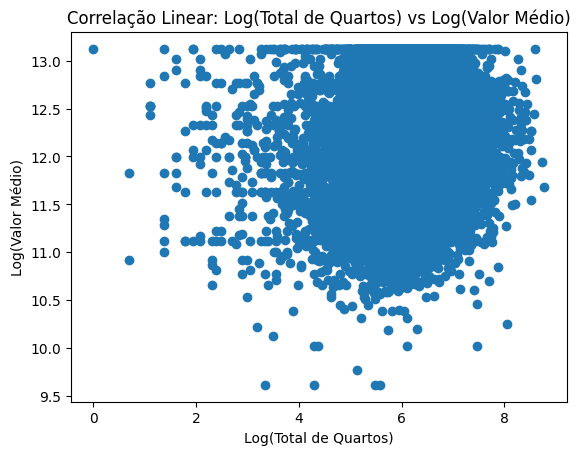

In [ ]:
plt.scatter(df_log.total_bedrooms_log, df_log.median_house_value_log)
plt.title('Correlação Linear: Log(Total de Quartos) vs Log(Valor Médio)')
plt.xlabel('Log(Total de Quartos)')
plt.ylabel('Log(Valor Médio)')
plt.grid(False)
plt.show()

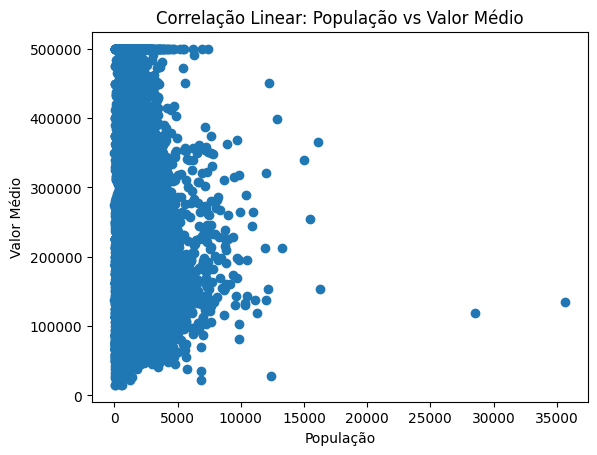

In [ ]:
plt.scatter(df.population, df.median_house_value)
plt.title('Correlação Linear: População vs Valor Médio')
plt.xlabel('População')
plt.ylabel('Valor Médio')
plt.grid(False)
plt.show()

In [ ]:
plt.scatter(df_log.population_log, df_log.median_house_value_log)
plt.title('Correlação Linear: Log(População) vs Log(Valor Médio)')
plt.xlabel('Log(População)')
plt.ylabel('Log(Valor Médio)')
plt.grid(False)
plt.show()

In [ ]:
plt.scatter(df.households, df.median_house_value)
plt.title('Correlação Linear: Domicílios vs Valor Médio')
plt.xlabel('Domicílios')
plt.ylabel('Valor Médio')
plt.grid(False)
plt.show()

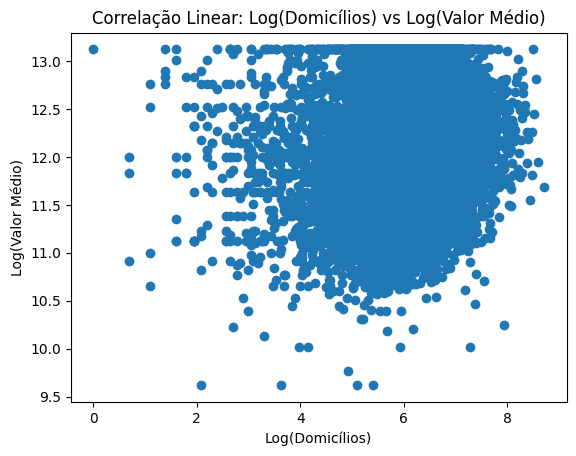

In [ ]:
plt.scatter(df_log.households_log, df_log.median_house_value_log)
plt.title('Correlação Linear: Log(Domicílios) vs Log(Valor Médio)')
plt.xlabel('Log(Domicílios)')
plt.ylabel('Log(Valor Médio)')
plt.grid(False)
plt.show()

In [ ]:
plt.scatter(df.median_income, df.median_house_value)
plt.title('Correlação Linear: Renda Média vs Valor Médio')
plt.xlabel('Renda Média')
plt.ylabel('Valor Médio')
plt.grid(False)
plt.show()

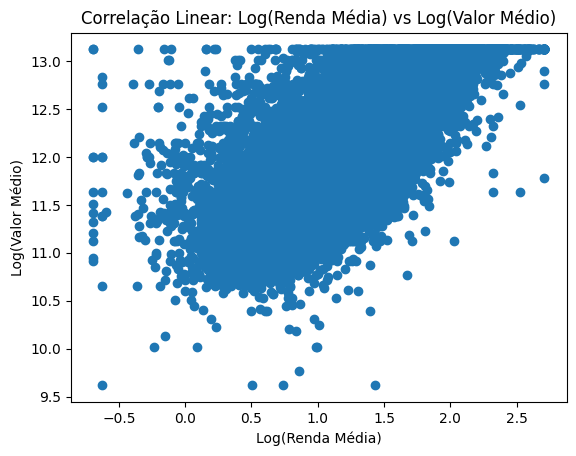

In [ ]:
plt.scatter(df_log.median_income_log, df_log.median_house_value_log)
plt.title('Correlação Linear: Log(Renda Média) vs Log(Valor Médio)')
plt.xlabel('Log(Renda Média)')
plt.ylabel('Log(Valor Médio)')
plt.grid(False)
plt.show()

##**Análise de normalidade**

In [ ]:
import scipy.stats as stats

In [ ]:
df_log

ONEH_OCEAN  INLAND  ISLAND  NEAR_BAY  NEAR_OCEAN  longitude  latitude  \
0             0.0     0.0     0.0       1.0         0.0    -122.23     37.88   
1             0.0     0.0     0.0       1.0         0.0    -122.22     37.86   
2             0.0     0.0     0.0       1.0         0.0    -122.24     37.85   
3             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
4             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
...           ...     ...     ...       ...         ...        ...       ...   
20635         0.0     1.0     0.0       0.0         0.0    -121.09     39.48   
20636         0.0     1.0     0.0       0.0         0.0    -121.21     39.49   
20637         0.0     1.0     0.0       0.0         0.0    -121.22     39.43   
20638         0.0     1.0     0.0       0.0         0.0    -121.32     39.43   
20639         0.0     1.0     0.0       0.0         0.0    -121.24     39.37   

       housing_median_age  total_bedrooms_log  total_rooms_log  \
0                    41.0            4.859812         6.779922   
1                    21.0            7.008505         8.867709   
2                    52.0            5.247024         7.290975   
3                    52.0            5.459586         7.149917   
4                    52.0            5.634790         7.394493   
...                   ...                 ...              ...   
20635                25.0            5.924256         7.417580   
20636                18.0            5.010635         6.546785   
20637                17.0            6.184149         7.720462   
20638                18.0            6.013715         7.528332   
20639                16.0            6.423247         7.932003   

       households_log  population_log  median_income_log  \
0            4.836282        5.774552           2.119287   
1            7.037028        7.783641           2.116424   
2            5.176150        6.206576           1.982022   
3            5.389072        6.324359           1.730434   
4            5.556828        6.336826           1.347086   
...               ...             ...                ...   
20635        5.799093        6.739337           0.444878   
20636        4.736198        5.874931           0.938756   
20637        6.070738        6.914731           0.530628   
20638        5.855072        6.608001           0.624440   
20639        6.272877        7.234898           0.870707   

       median_house_value_log  
0                   13.022764  
1                   12.789684  
2                   12.771671  
3                   12.740517  
4                   12.743151  
...                       ...  
20635               11.265745  
20636               11.252859  
20637               11.432799  
20638               11.346871  
20639               11.400876  

[20640 rows x 14 columns]

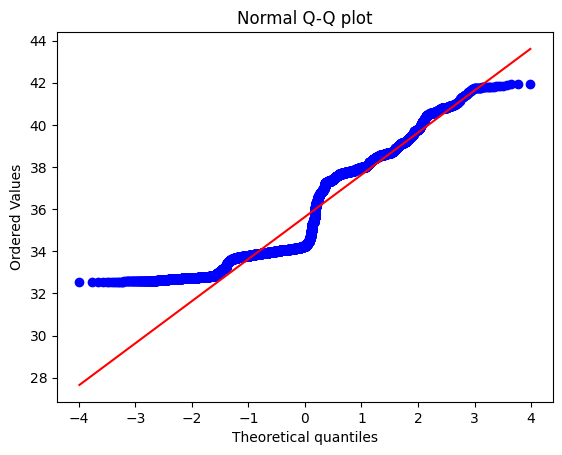

In [ ]:
stats.probplot(df2['latitude'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df2,  x = "latitude", nbins=60)
hist.update_layout(width=800,height=500,title_text='Média dos valores')
hist.show()

In [ ]:
stats.probplot(df2['longitude'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Longitude")
plt.show()

In [ ]:
hist =  px.histogram (df2,  x = "longitude", nbins=60)
hist.update_layout(width=800,height=500,title_text='Média dos valores')
hist.show()

In [ ]:
stats.probplot(df2['housing_median_age'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Housing Median Age")
plt.show()

In [ ]:
hist =  px.histogram (df2,  x = "housing_median_age", nbins=60)
hist.update_layout(width=800,height=500,title_text='Média dos valores')
hist.show()

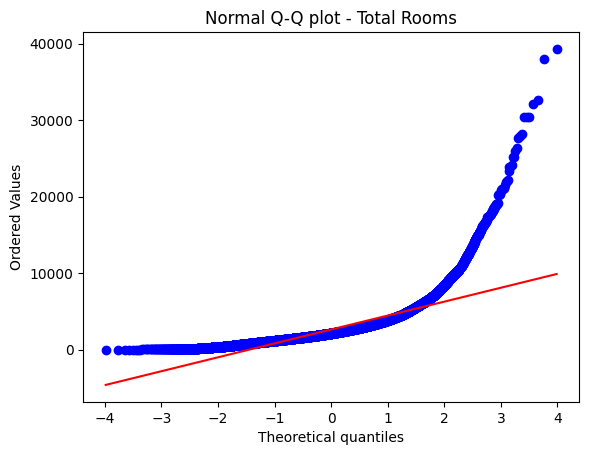

In [ ]:
stats.probplot(df2['total_rooms'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Total Rooms")
plt.show()

In [ ]:
hist =  px.histogram (df2,  x = "total_rooms", nbins=60)
hist.update_layout(width=800,height=500,title_text='Média dos valores')
hist.show()

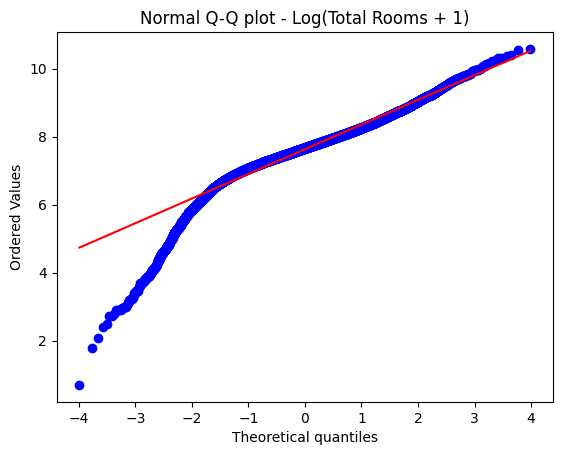

In [ ]:
stats.probplot(df_log['total_rooms_log'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Log(Total Rooms + 1)")
plt.show()

In [ ]:
stats.probplot(df2['total_bedrooms'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Total Bedrooms")
plt.show()

In [ ]:
hist =  px.histogram (df2,  x = "total_bedrooms", nbins=60)
hist.update_layout(width=800,height=500,title_text='Média dos valores')
hist.show()

In [ ]:
stats.probplot(df_log['total_bedrooms_log'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Log(Total Bedrooms + 1)")
plt.show()

In [ ]:
stats.probplot(df2['population'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Population")
plt.show()

In [ ]:
hist =  px.histogram (df2,  x = "population", nbins=60)
hist.update_layout(width=800,height=500,title_text='Média dos valores')
hist.show()

In [ ]:
stats.probplot(df_log['population_log'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Log(Population + 1)")
plt.show()

In [ ]:
stats.probplot(df2['households'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Households")
plt.show()

In [ ]:
hist =  px.histogram (df2,  x = "households", nbins=60)
hist.update_layout(width=800,height=500,title_text='Média dos valores')
hist.show()

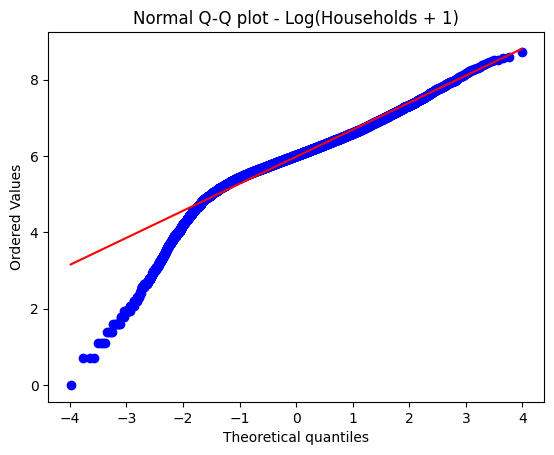

In [ ]:
stats.probplot(df_log['households_log'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Log(Households + 1)")
plt.show()

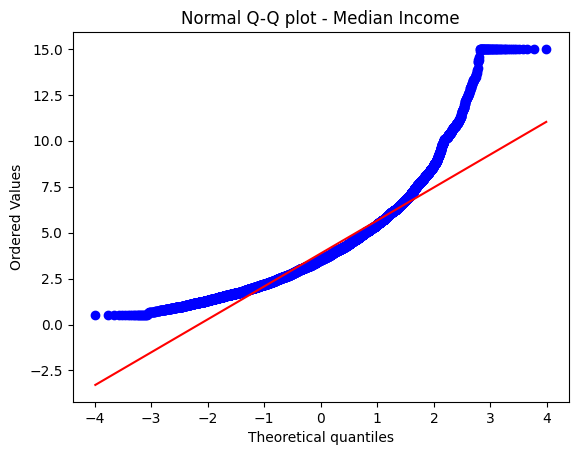

In [ ]:
stats.probplot(df2['median_income'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Median Income")
plt.show()

In [ ]:
hist =  px.histogram (df2,  x = "median_income", nbins=60)
hist.update_layout(width=800,height=500,title_text='Média dos valores')
hist.show()

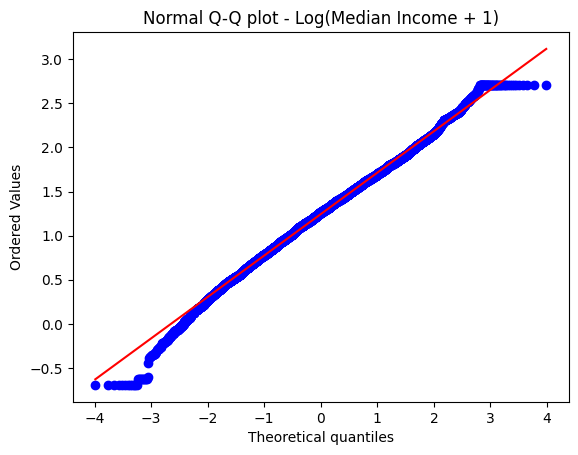

In [ ]:
stats.probplot(df_log['median_income_log'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Log(Median Income + 1)")
plt.show()

In [ ]:
stats.probplot(df2['median_house_value'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Median House Value")
plt.show()

In [ ]:
stats.probplot(df_log['median_house_value_log'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Log(Median House Value + 1)")
plt.show()

## Teste Lilliefors (Kolmogorov_Sminorv)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

### Dados normais

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.longitude, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.20511917925058837
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.latitude, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.24742679352964098
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.housing_median_age, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.06050135200320761
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.total_rooms, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.15829554335069884
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.total_bedrooms, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.15251980590061376
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.population, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.14713026769169968
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.households, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.14618368329350373
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.median_income, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.08942727065082523
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.median_house_value, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.10298580690210801
p-valor: 0.0009999999999998899


### Dados com transformação logaritima

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_log.total_rooms_log, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.07293281784826111
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_log.total_bedrooms_log, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.0698630001532062
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_log.population_log, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.06828067735537866
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_log.households_log, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.07363845125430613
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_log.median_income_log, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.02148927156238456
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_log.median_house_value_log, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.03415848184700088
p-valor: 0.0009999999999998899


## Correlação Linear

### Teste de Spearman

Ho = não há correlação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [ ]:
coef,p = stats.spearmanr(df.median_house_value, df.latitude)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: -0.1657388374452999
p-valor: 4.994632332612018e-127


In [ ]:
coef,p = stats.spearmanr(df.median_house_value, df.longitude)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: -0.06966666665067331
p-valor: 1.2410018250955724e-23


In [ ]:
coef,p = stats.spearmanr(df.median_house_value, df.housing_median_age)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.07485485302251019
p-valor: 4.8443294949346314e-27


In [ ]:
coef,p = stats.spearmanr(df.median_house_value, df.total_rooms)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.20595200847635764
p-valor: 1.5614222609650307e-196


In [ ]:
coef,p = stats.spearmanr(df.median_house_value, df.total_bedrooms)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.08567089965472718
p-valor: 6.248806786584815e-35


In [ ]:
coef,p = stats.spearmanr(df.median_house_value, df.population)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.0038387551282557182
p-valor: 0.5813126917160487


In [ ]:
coef,p = stats.spearmanr(df.median_house_value, df.households)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.11273702236497356
p-valor: 2.3324891394863148e-59


In [ ]:
coef,p = stats.spearmanr(df.median_house_value, df.median_income)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.6767781095942506
p-valor: 0.0


#### Dados com transformação logarítima

In [ ]:
coef,p = stats.spearmanr(df_log.median_house_value_log, df_log.total_rooms_log)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.20595200847635764
p-valor: 1.5614222609650307e-196


In [ ]:
coef,p = stats.spearmanr(df_log.median_house_value_log, df_log.total_bedrooms_log)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.08567089965472718
p-valor: 6.248806786584815e-35


In [ ]:
coef,p = stats.spearmanr(df_log.median_house_value_log, df_log.population_log)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.0038387551282557182
p-valor: 0.5813126917160487


In [ ]:
coef,p = stats.spearmanr(df_log.median_house_value_log, df_log.households_log)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.11273702236497356
p-valor: 2.3324891394863148e-59


In [ ]:
coef,p = stats.spearmanr(df_log.median_house_value_log, df_log.median_income_log)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.6767781095942506
p-valor: 0.0


In [ ]:
correlacoes = df2.corr(method='spearman')
correlacoes.head()

ONEH_OCEAN    INLAND    ISLAND  NEAR_BAY  NEAR_OCEAN  longitude  \
ONEH_OCEAN    1.000000 -0.607669 -0.013872 -0.314813   -0.342620   0.259843   
INLAND       -0.607669  1.000000 -0.010614 -0.240887   -0.262163  -0.012786   
ISLAND       -0.013872 -0.010614  1.000000 -0.005499   -0.005985   0.003560   
NEAR_BAY     -0.314813 -0.240887 -0.005499  1.000000   -0.135818  -0.473995   
NEAR_OCEAN   -0.342620 -0.262163 -0.005985 -0.135818    1.000000   0.076726   

            latitude  housing_median_age  total_rooms  total_bedrooms  \
ONEH_OCEAN -0.425229            0.056031     0.004709        0.024371   
INLAND      0.373859           -0.238075    -0.001917       -0.034470   
ISLAND     -0.022495            0.014815    -0.009910       -0.002672   
NEAR_BAY    0.350987            0.239482    -0.014712       -0.017228   
NEAR_OCEAN -0.217016            0.022510     0.009935        0.028038   

            population  households  median_income  median_house_value  
ONEH_OCEAN    0.112054    0.055718       0.184480            0.332335  
INLAND       -0.055346   -0.073925      -0.254781           -0.566251  
ISLAND       -0.016021   -0.012710      -0.010779            0.020577  
NEAR_BAY     -0.071631   -0.007546       0.060098            0.160153  
NEAR_OCEAN   -0.021344    0.027771       0.024639            0.142940

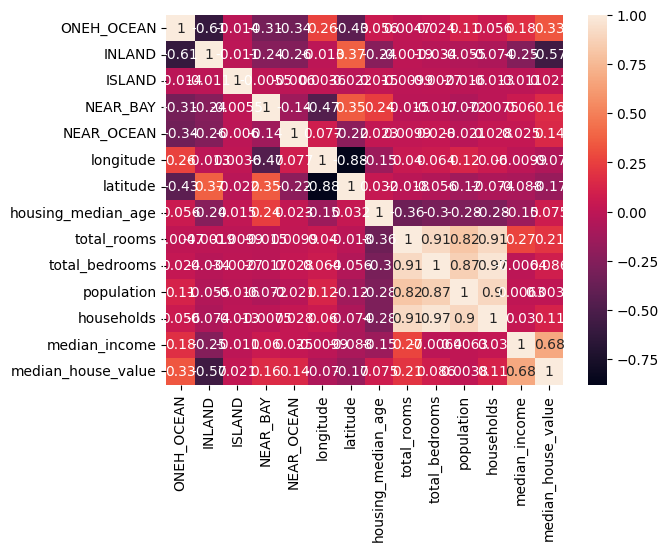

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

# REGRESSÃO LINEAR SIMPLES

## Population

**Valor médio da casa (median_house_value) em função do número da população total em um quarteirão(population)**

In [ ]:
df2

ONEH_OCEAN  INLAND  ISLAND  NEAR_BAY  NEAR_OCEAN  longitude  latitude  \
0             0.0     0.0     0.0       1.0         0.0    -122.23     37.88   
1             0.0     0.0     0.0       1.0         0.0    -122.22     37.86   
2             0.0     0.0     0.0       1.0         0.0    -122.24     37.85   
3             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
4             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
...           ...     ...     ...       ...         ...        ...       ...   
20635         0.0     1.0     0.0       0.0         0.0    -121.09     39.48   
20636         0.0     1.0     0.0       0.0         0.0    -121.21     39.49   
20637         0.0     1.0     0.0       0.0         0.0    -121.22     39.43   
20638         0.0     1.0     0.0       0.0         0.0    -121.32     39.43   
20639         0.0     1.0     0.0       0.0         0.0    -121.24     39.37   

       housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value  
0           126.0         8.3252            452600.0  
1          1138.0         8.3014            358500.0  
2           177.0         7.2574            352100.0  
3           219.0         5.6431            341300.0  
4           259.0         3.8462            342200.0  
...           ...            ...                 ...  
20635       330.0         1.5603             78100.0  
20636       114.0         2.5568             77100.0  
20637       433.0         1.7000             92300.0  
20638       349.0         1.8672             84700.0  
20639       530.0         2.3886             89400.0  

[20640 rows x 14 columns]

In [ ]:
df_log

ONEH_OCEAN  INLAND  ISLAND  NEAR_BAY  NEAR_OCEAN  longitude  latitude  \
0             0.0     0.0     0.0       1.0         0.0    -122.23     37.88   
1             0.0     0.0     0.0       1.0         0.0    -122.22     37.86   
2             0.0     0.0     0.0       1.0         0.0    -122.24     37.85   
3             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
4             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
...           ...     ...     ...       ...         ...        ...       ...   
20635         0.0     1.0     0.0       0.0         0.0    -121.09     39.48   
20636         0.0     1.0     0.0       0.0         0.0    -121.21     39.49   
20637         0.0     1.0     0.0       0.0         0.0    -121.22     39.43   
20638         0.0     1.0     0.0       0.0         0.0    -121.32     39.43   
20639         0.0     1.0     0.0       0.0         0.0    -121.24     39.37   

       housing_median_age  total_bedrooms_log  total_rooms_log  \
0                    41.0            4.859812         6.779922   
1                    21.0            7.008505         8.867709   
2                    52.0            5.247024         7.290975   
3                    52.0            5.459586         7.149917   
4                    52.0            5.634790         7.394493   
...                   ...                 ...              ...   
20635                25.0            5.924256         7.417580   
20636                18.0            5.010635         6.546785   
20637                17.0            6.184149         7.720462   
20638                18.0            6.013715         7.528332   
20639                16.0            6.423247         7.932003   

       households_log  population_log  median_income_log  \
0            4.836282        5.774552           2.119287   
1            7.037028        7.783641           2.116424   
2            5.176150        6.206576           1.982022   
3            5.389072        6.324359           1.730434   
4            5.556828        6.336826           1.347086   
...               ...             ...                ...   
20635        5.799093        6.739337           0.444878   
20636        4.736198        5.874931           0.938756   
20637        6.070738        6.914731           0.530628   
20638        5.855072        6.608001           0.624440   
20639        6.272877        7.234898           0.870707   

       median_house_value_log  
0                   13.022764  
1                   12.789684  
2                   12.771671  
3                   12.740517  
4                   12.743151  
...                       ...  
20635               11.265745  
20636               11.252859  
20637               11.432799  
20638               11.346871  
20639               11.400876  

[20640 rows x 14 columns]

In [ ]:
x_population = df2.loc[:,['population']].values
y_population = df2.loc[:,['median_house_value']].values

In [ ]:
from sklearn.model_selection import train_test_split
x_treino_population, x_teste_population, y_treino_population, y_teste_population = train_test_split(x_population, y_population, test_size = 0.3, random_state = 7)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_linear_population = LinearRegression()
reg_linear_population.fit(x_treino_population, y_treino_population)

LinearRegression()

In [ ]:
print("Coeficiente:", reg_linear_population.coef_)
print("Intercepto:", reg_linear_population.intercept_)

Coeficiente: [[-2.29854837]]
Intercepto: [209343.96282326]


In [ ]:
print("Equação: Valor = {:.2f} + {:.2f} * População".format(reg_linear_population.intercept_[0], reg_linear_population.coef_[0][0]))

Equação: Valor = 209343.96 + -2.30 * População


In [ ]:
print("Score no treino:", reg_linear_population.score(x_treino_population, y_treino_population))
print("Score no teste:", reg_linear_population.score(x_teste_population, y_teste_population))

Score no treino: 0.0005342055319971228
Score no teste: 0.00024007615925447645


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
previsoes_population_teste = reg_linear_population.predict(x_teste_population)

# Erro médio absoluto
mae = mean_absolute_error(y_teste_population, previsoes_population_teste)
print("MAE:", mae)

# Erro quadrático médio
mse = mean_squared_error(y_teste_population, previsoes_population_teste)
print("MSE:", mse)

# Raiz do erro quadrático médio
rmse = np.sqrt(mse)
print("RMSE:", rmse)

MAE: 91274.99409587427
MSE: 13355609543.174267
RMSE: 115566.47240084066


In [ ]:
plt.scatter(y=y_treino_population, x=x_treino_population, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 39000)
plt.plot(X_plot, X_plot*reg_linear_population.coef_[0][0] + reg_linear_population.intercept_[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade Média de Cômodos')
plt.show()

## Latitude

**Valor médio da casa (median_house_value) em função da posição latitudinal da casa (latitude)**

In [ ]:
x_latitude = df2.loc[:,['latitude']].values
y_latitude = df2.loc[:,['median_house_value']].values

In [ ]:
from sklearn.model_selection import train_test_split
x_treino_latitude, x_teste_latitude, y_treino_latitude, y_teste_latitude = train_test_split(x_latitude, y_latitude, test_size = 0.3, random_state = 7)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_linear_latitude = LinearRegression()
reg_linear_latitude.fit(x_treino_latitude, y_treino_latitude)

LinearRegression()

In [ ]:
print("Coeficiente:", reg_linear_latitude.coef_)
print("Intercepto:", reg_linear_latitude.intercept_)

Coeficiente: [[-7739.72331053]]
Intercepto: [481902.4025182]


In [ ]:
print("Equação: Valor = {:.2f} + {:.2f} * Latitude".format(reg_linear_latitude.intercept_[0], reg_linear_latitude.coef_[0][0]))

Equação: Valor = 481902.40 + -7739.72 * Latitude


In [ ]:
print("Score no treino:", reg_linear_latitude.score(x_treino_latitude, y_treino_latitude))
print("Score no teste:", reg_linear_latitude.score(x_teste_latitude, y_teste_latitude))

Score no treino: 0.020626214612741722
Score no teste: 0.02064628653757583


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
previsoes_latitude_teste = reg_linear_latitude.predict(x_teste_latitude)

# Erro médio absoluto
mae_latitude = mean_absolute_error(y_teste_latitude, previsoes_latitude_teste)
print("MAE:", mae_latitude)

# Erro quadrático médio
mse_latitude = mean_squared_error(y_teste_latitude, previsoes_latitude_teste)
print("MSE:", mse_latitude)

# Raiz do erro quadrático médio
rmse_latitude = np.sqrt(mse_latitude)
print("RMSE:", rmse_latitude)

MAE: 90560.97607043308
MSE: 13083006719.666666
RMSE: 114380.9718426394


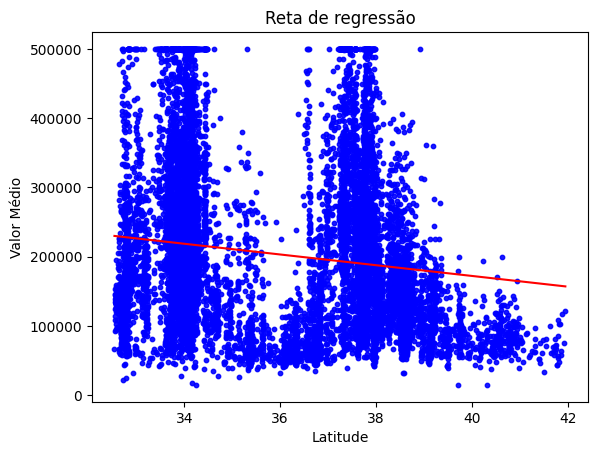

In [ ]:
plt.scatter(y=y_treino_latitude, x=x_treino_latitude, color='blue', s=10, alpha=0.9)
X_plot_latitude = np.linspace(np.min(x_treino_latitude), np.max(x_treino_latitude))
plt.plot(X_plot_latitude, X_plot_latitude*reg_linear_latitude.coef_[0] + reg_linear_latitude.intercept_[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Latitude')
plt.show()

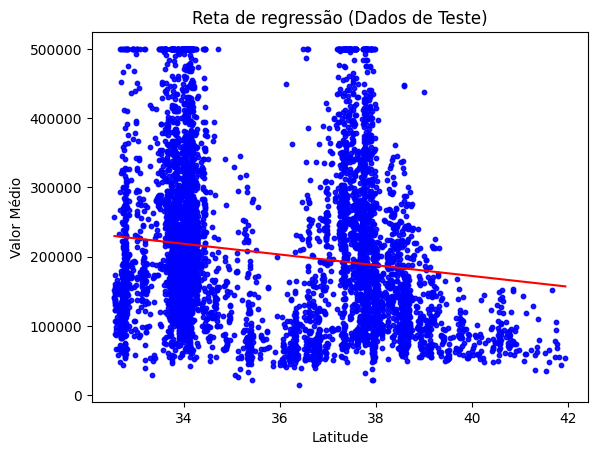

In [ ]:
plt.scatter(y=y_teste_latitude, x=x_teste_latitude, color='blue', s=10, alpha=0.9)
X_plot_latitude = np.linspace(np.min(x_teste_latitude), np.max(x_teste_latitude))
plt.plot(X_plot_latitude, X_plot_latitude*reg_linear_latitude.coef_[0] + reg_linear_latitude.intercept_[0], color='r')
plt.title('Reta de regressão (Dados de Teste)')
plt.ylabel('Valor Médio')
plt.xlabel('Latitude')
plt.show()

# REGRESSÃO LINEAR MÚLTIPLA

In [ ]:
x_multipla = df2.drop('median_house_value', axis=1).values

y_multipla= df2['median_house_value'].values

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
x_treino_multipla, x_teste_multipla, y_treino_multipla, y_teste_multipla = train_test_split(x_multipla, y_multipla, test_size = 0.3, random_state = 7)

In [ ]:
reg_multipla = LinearRegression()
reg_multipla.fit(x_treino_multipla, y_treino_multipla)

LinearRegression()

In [ ]:
print("Coeficiente:", reg_multipla.coef_)
print("Intercepto:", reg_multipla.intercept_)

Coeficiente: [-2.40612575e+04 -6.26722633e+04  1.31117381e+05 -2.60700361e+04
 -1.83138243e+04 -2.58767253e+04 -2.45545983e+04  1.03561289e+03
 -6.51359497e+00  7.09582885e+01 -3.66347129e+01  8.09644025e+01
  3.93726711e+04]
Intercepto: -2167993.1909207813


In [ ]:
print("Score no treino:", reg_multipla.score(x_treino_multipla, y_treino_multipla))
print("Score no teste:", reg_multipla.score(x_teste_multipla, y_teste_multipla))

Score no treino: 0.6432915663850445
Score no teste: 0.6495687465966953


Equação: Valor = -2167993.19 + (-24061.26)*latitude + (-62672.26)*longitude + (131117.38)*housing_median_age + (-26070.04)*total_rooms + (-18313.82)*total_bedrooms + (-25876.73)*population + (-24554.60)*households + (1035.61)*median_income + (-6.51)*1H_NEAR_BAY + (70.96)*1H_OCEAN + (-36.63)*INLAND + (80.96)*ISLAND + (39372.67)*NEAR_OCEAN


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
previsoes_multipla_teste = reg_multipla.predict(x_teste_multipla)

# Erro médio absoluto
mae_multipla = mean_absolute_error(y_teste_multipla, previsoes_multipla_teste)
print("MAE:", mae_multipla)

# Erro quadrático médio
mse_multipla = mean_squared_error(y_teste_multipla, previsoes_multipla_teste)
print("MSE:", mse_multipla)

# Raiz do erro quadrático médio
rmse_multipla = np.sqrt(mse_multipla)
print("RMSE:", rmse_multipla)

MAE: 49633.92094648632
MSE: 4681346871.956855
RMSE: 68420.36883821114


### Validação cruzada

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [ ]:
from sklearn.linear_model import LinearRegression
modelo_multipla = LinearRegression()
resultado = cross_val_score(modelo_multipla, provisores, alvo, cv = kfold)
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 64.35%


# REGRESSÃO POR VETORES DE SUPORTE

In [ ]:
df2

ONEH_OCEAN  INLAND  ISLAND  NEAR_BAY  NEAR_OCEAN  longitude  latitude  \
0             0.0     0.0     0.0       1.0         0.0    -122.23     37.88   
1             0.0     0.0     0.0       1.0         0.0    -122.22     37.86   
2             0.0     0.0     0.0       1.0         0.0    -122.24     37.85   
3             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
4             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
...           ...     ...     ...       ...         ...        ...       ...   
20635         0.0     1.0     0.0       0.0         0.0    -121.09     39.48   
20636         0.0     1.0     0.0       0.0         0.0    -121.21     39.49   
20637         0.0     1.0     0.0       0.0         0.0    -121.22     39.43   
20638         0.0     1.0     0.0       0.0         0.0    -121.32     39.43   
20639         0.0     1.0     0.0       0.0         0.0    -121.24     39.37   

       housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value  
0           126.0         8.3252            452600.0  
1          1138.0         8.3014            358500.0  
2           177.0         7.2574            352100.0  
3           219.0         5.6431            341300.0  
4           259.0         3.8462            342200.0  
...           ...            ...                 ...  
20635       330.0         1.5603             78100.0  
20636       114.0         2.5568             77100.0  
20637       433.0         1.7000             92300.0  
20638       349.0         1.8672             84700.0  
20639       530.0         2.3886             89400.0  

[20640 rows x 14 columns]

In [ ]:
x_svr = df2.iloc[:, 0:13].values

In [ ]:
y_svr = df2.iloc[:, 13].values

In [ ]:
from sklearn.model_selection import train_test_split
x_treino_svr, x_teste_svr, y_treino_svr, y_teste_svr = train_test_split(x_svr, y_svr, test_size = 0.3, random_state = 7)

**Padronização de escala**

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino_svr)
x_teste_scaler = x_scaler.transform(x_teste_svr)

In [ ]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino_svr.reshape(-1,1))
y_teste_scaler = y_scaler.transform(y_teste_svr.reshape(-1,1))

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_treino_scaler, y_treino_scaler.ravel())

SVR()

In [ ]:
print("Score no treino:", svr_reg.score(x_treino_scaler, y_treino_scaler))
print("Score no teste:", svr_reg.score(x_teste_scaler, y_teste_scaler))

Score no treino: 0.7656662150442901
Score no teste: 0.754316009249022


In [ ]:
previsoes_teste_svr = svr_reg.predict(x_teste_scaler)

In [ ]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_teste_svr.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Erro médio absoluto
mae_svr = mean_absolute_error(y_teste_inverse, previsoes_inverse)
print("MAE (SVR):", mae_svr)

# Erro quadrático médio
mse_svr = mean_squared_error(y_teste_inverse, previsoes_inverse)
print("MSE (SVR):", mse_svr)

# Raiz do erro quadrático médio
rmse_svr = np.sqrt(mse_svr)
print("RMSE (SVR):", rmse_svr)

MAE (SVR): 38117.87560790792
MSE (SVR): 3282047392.8114557
RMSE (SVR): 57289.1559792205


In [ ]:
from sklearn.preprocessing import StandardScaler
independente_scaler = x_scaler.fit_transform(x_svr)
dependente_scaler = y_scaler.fit_transform(y_svr.reshape(-1,1))

In [ ]:
from sklearn.svm import SVR
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)
modelo_svr = SVR(kernel='rbf')
resultado = cross_val_score(modelo_svr, independente_scaler, dependente_scaler.ravel(), cv = kfold)
print("Coeficiente de Determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação médio: 75.82%


# REGRESSÃO COM ÁRVORE DE DECISÃO

In [ ]:
x_arvore = df2.iloc[:, 0:13].values

In [ ]:
y_arvore = df2.iloc[:, 13].values

In [ ]:
from sklearn.model_selection import train_test_split
x_treino_arvore, x_teste_arvore, y_treino_arvore, y_teste_arvore = train_test_split(x_arvore, y_arvore, test_size = 0.3, random_state = 7)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=8, random_state=7)
arvore.fit(x_treino_arvore, y_treino_arvore)

DecisionTreeRegressor(max_depth=8, random_state=7)

In [ ]:
print("Score no treino:", arvore.score(x_treino_arvore, y_treino_arvore))
print("Score no teste:", arvore.score(x_teste_arvore, y_teste_arvore))

Score no treino: 0.7658907001255586
Score no teste: 0.6894361164390183


In [ ]:
previsoes_arvore_teste = arvore.predict(x_teste_arvore)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

previsoes_arvore_teste = arvore.predict(x_teste_arvore)

# Erro médio absoluto
mae_arvore = mean_absolute_error(y_teste_arvore, previsoes_arvore_teste)
print("MAE (ÁRVORE):", mae_arvore)

# Erro quadrático médio
mse_arvore = mean_squared_error(y_teste_arvore, previsoes_arvore_teste)
print("MSE (ÁRVORE):", mse_arvore)

# Raiz do erro quadrático médio
rmse_arvore = np.sqrt(mse_arvore)
print("RMSE (ÁRVORE):", rmse_arvore)

MAE (ÁRVORE): 43875.18156154743
MSE (ÁRVORE): 4148765986.8560796
RMSE (ÁRVORE): 64410.91512202012


**Validação Cruazada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [ ]:
from sklearn.linear_model import LinearRegression
modelo_arvore =  DecisionTreeRegressor(max_depth=8, random_state=7)
resultado = cross_val_score(modelo_arvore, x_arvore, y_arvore, cv = kfold)
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 70.04%


# REGRESSÃO COM RANDOM FOREST

In [ ]:
x_randomf = df2.iloc[:, 0:13].values

In [ ]:
y_randomf = df2.iloc[:, 13].values

In [ ]:
from sklearn.model_selection import train_test_split
x_treino_randomf, x_teste_randomf, y_treino_randomf, y_teste_randomf = train_test_split(x_randomf, y_randomf, test_size = 0.3, random_state = 7)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random = RandomForestRegressor(n_estimators=200, criterion='poisson', max_depth=9, random_state = 7)
random.fit(x_treino_randomf, y_treino_randomf)

RandomForestRegressor(criterion='poisson', max_depth=9, n_estimators=200,
                      random_state=7)

In [ ]:
print("Score no treino:", random.score(x_treino_randomf, y_treino_randomf))
print("Score no teste:", random.score(x_teste_randomf, y_teste_randomf))

Score no treino: 0.8350246670317988
Score no teste: 0.7668819151755554


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

previsoes_teste_randomf = random.predict(x_teste_randomf)

# Erro médio absoluto
mae_randomf = mean_absolute_error(y_teste_randomf, previsoes_teste_randomf)
print("MAE (RANDOM FOREST):", mae_randomf)

# Erro quadrático médio
mse_randomf = mean_squared_error(y_teste_randomf, previsoes_teste_randomf)
print("MSE (RANDOM FOREST):", mse_randomf)

# Raiz do erro quadrático médio
rmse_randomf = np.sqrt(mse_randomf)
print("RMSE (RANDOM FOREST):", rmse_randomf)

MAE (RANDOM FOREST): 37862.141719633466
MSE (RANDOM FOREST): 3114181759.1638217
RMSE (RANDOM FOREST): 55804.854261648434


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [ ]:
modelo_randomf =  RandomForestRegressor(n_estimators=200, criterion='poisson', max_depth=9, random_state = 7)
resultado = cross_val_score(modelo_randomf, x_randomf, y_randomf, cv = kfold)
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 77.66%


# REGRESSÃO COM XGBOOST

In [ ]:
x_xg = df2.iloc[:, 0:13].values

In [ ]:
y_xg = df2.iloc[:, 13].values

In [ ]:
x_treino_xg, x_teste_xg, y_treino_xg, y_teste_xg = train_test_split(x_xg, y_xg, test_size = 0.3, random_state = 7)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgboost = XGBRegressor(n_estimators=250, max_depth=7, learning_rate=0.05, objective="reg:squarederror", random_state=7)
xgboost.fit(x_treino_xg, y_treino_xg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=7, ...)

In [ ]:
print("Score no treino:", xgboost.score(x_treino_xg, y_treino_xg))
print("Score no teste:", xgboost.score(x_teste_xg, y_teste_xg))

Score no treino: 0.9352341059219629
Score no teste: 0.8304946947456668


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

previsoes_teste_xg = xgboost.predict(x_teste_xg)

# Erro médio absoluto
mae_xg = mean_absolute_error(y_teste_xg, previsoes_teste_xg)
print("MAE (XGBOOST):", mae_xg)

# Erro quadrático médio
mse_xg = mean_squared_error(y_teste_xg, previsoes_teste_xg)
print("MSE (XGBOOST):", mse_xg)

# Raiz do erro quadrático médio
rmse_xg = np.sqrt(mse_xg)
print("RMSE (XGBOOST):", rmse_xg)

MAE (XGBOOST): 31157.29538429122
MSE (XGBOOST): 2264390298.5993795
RMSE (XGBOOST): 47585.610205180514


**Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [ ]:
from xgboost import XGBRegressor
modelo_xg =  XGBRegressor(n_estimators=250, max_depth=7, learning_rate=0.05, objective="reg:squarederror", random_state=7)
resultado = cross_val_score(modelo_xg, x_xg, y_xg, cv = kfold)
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 83.60%


# REGRESSÃO COM LIGHT GBM

In [ ]:
x_lgbm = df2.iloc[:, 0:13].values

In [ ]:
y_lgbm = df2.iloc[:, 13].values

In [ ]:
x_treino_lgbm, x_teste_lgbm, y_treino_lgbm, y_teste_lgbm = train_test_split(x_lgbm, y_lgbm, test_size = 0.3, random_state = 7)

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm = lgb.LGBMRegressor(num_leaves=55, max_depth=8, learning_rate=0.2, n_estimators=50, random_state=7,verbose=-1)
lgbm.fit(x_treino_lgbm, y_treino_lgbm)

LGBMRegressor(learning_rate=0.2, max_depth=8, n_estimators=50, num_leaves=55,
              random_state=7, verbose=-1)

In [ ]:
print("Score no treino:", lgbm.score(x_treino_lgbm, y_treino_lgbm))
print("Score no teste:", lgbm.score(x_teste_lgbm, y_teste_lgbm))

Score no treino: 0.8969650659403214
Score no teste: 0.8263128139141616


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

previsoes_teste_lgbm = lgbm.predict(x_teste_lgbm)

# Erro médio absoluto
mae_lgbp = mean_absolute_error(y_teste_lgbm, previsoes_teste_lgbm)
print("MAE (LIGHT GBM):", mae_lgbp)

# Erro quadrático médio
mse_lgbp = mean_squared_error(y_teste_lgbm, previsoes_teste_lgbm)
print("MSE (LIGHT GBM):", mse_lgbp)

# Raiz do erro quadrático médio
rmse_lgbp = np.sqrt(mse_lgbp)
print("RMSE (LIGHT GBM):", rmse_lgbp)

MAE (LIGHT GBM): 32013.924948149594
MSE (LIGHT GBM): 2320255277.990738
RMSE (LIGHT GBM): 48169.02820268163


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [ ]:
import lightgbm as lgb
modelo_lgbm =  lgb.LGBMRegressor(num_leaves=55, max_depth=8, learning_rate=0.2, n_estimators=50, random_state=7,verbose=-1)
resultado = cross_val_score(modelo_lgbm, x_lgbm, y_lgbm, cv = kfold)
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 83.22%


# REGRESSÃO COM CATBOOST

In [ ]:
!pip install catboost

In [ ]:
x_catb = df2.iloc[:, 0:13].values

In [ ]:
y_catb = df2.iloc[:, 13].values

In [ ]:
x_treino_catb, x_teste_catb, y_treino_catb, y_teste_catb = train_test_split(x_catb, y_catb, test_size = 0.3, random_state = 7)

In [ ]:
from catboost.core import CatBoostRegressor

In [ ]:
catboost = CatBoostRegressor (iterations=300, learning_rate=0.09, depth = 9, random_state = 7, verbose=False)
catboost.fit(x_treino_catb, y_treino_catb)

In [ ]:
print("Score no treino:", catboost.score(x_treino_catb, y_treino_catb))
print("Score no teste:", lgbm.score(x_teste_catb, y_teste_catb))

Score no treino: 0.9046996102126322
Score no teste: 0.8263128139141616


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

previsoes_teste_catb = catboost.predict(x_teste_catb)

# Erro médio absoluto
mae_catb = mean_absolute_error(y_teste_catb, previsoes_teste_catb)
print("MAE (CATBOOST):", mae_catb)

# Erro quadrático médio
mse_catb = mean_squared_error(y_teste_catb, previsoes_teste_catb)
print("MSE (CATBOOST):", mse_catb)

# Raiz do erro quadrático médio
rmse_catb = np.sqrt(mse_catb)
print("RMSE (CATBOOST):", rmse_catb)

MAE (CATBOOST): 31290.503826566637
MSE (CATBOOST): 2219201093.2284536
RMSE (CATBOOST): 47108.397268729634


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [ ]:
from catboost.core import CatBoostRegressor
modelo_catb =  CatBoostRegressor (iterations=300, learning_rate=0.09, depth = 9, random_state = 7, verbose=False)
resultado = cross_val_score(modelo_catb, x_catb, y_catb, cv = kfold)
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 83.89%


# REGRESSÃO COM REDES NEURAIS

In [ ]:
x_rn = df2.iloc[:, 0:13].values

In [ ]:
x_rn.shape

(20640, 13)

In [ ]:
y_rn = df2.iloc[:, 13].values

In [ ]:
x_treino_rn, x_teste_rn, y_treino_rn, y_teste_rn = train_test_split(x_rn, y_rn, test_size = 0.3, random_state = 7)

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler_rn = StandardScaler()
x_treino_rn_scaler = x_scaler_rn.fit_transform(x_treino_rn)
x_teste_rn_scaler = x_scaler_rn.transform(x_teste_rn)

y_scaler_rn = StandardScaler()
y_treino_rn_scaler = y_scaler_rn.fit_transform(y_treino_rn.reshape(-1, 1))
y_teste_rn_scaler = y_scaler_rn.transform(y_teste_rn.reshape(-1, 1))


In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
reg_neural = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', verbose=True, batch_size='auto', solver='adam', random_state = 7)
reg_neural.fit(x_treino_rn_scaler, y_treino_rn_scaler)

Iteration 1, loss = 0.23079359
Iteration 2, loss = 0.15620330
Iteration 3, loss = 0.14270896
Iteration 4, loss = 0.13675555
Iteration 5, loss = 0.13451516
Iteration 6, loss = 0.13392774
Iteration 7, loss = 0.12494342
Iteration 8, loss = 0.12294095
Iteration 9, loss = 0.12091251
Iteration 10, loss = 0.11927261
Iteration 11, loss = 0.11672416
Iteration 12, loss = 0.11584084
Iteration 13, loss = 0.11459018
Iteration 14, loss = 0.11321794
Iteration 15, loss = 0.11200685
Iteration 16, loss = 0.11190946
Iteration 17, loss = 0.11167998
Iteration 18, loss = 0.10999176
Iteration 19, loss = 0.10925482
Iteration 20, loss = 0.10853578
Iteration 21, loss = 0.10947559
Iteration 22, loss = 0.11030750
Iteration 23, loss = 0.10667723
Iteration 24, loss = 0.10572101
Iteration 25, loss = 0.10429524
Iteration 26, loss = 0.10498435
Iteration 27, loss = 0.10464597
Iteration 28, loss = 0.10378181
Iteration 29, loss = 0.10348127
Iteration 30, loss = 0.10304221
Iteration 31, loss = 0.10248481
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(100, 50), random_state=7, verbose=True)

In [ ]:
print("Score no treino:", reg_neural.score(x_treino_rn_scaler, y_treino_rn_scaler))
print("Score no teste:", reg_neural.score(x_teste_rn_scaler, y_teste_rn_scaler))

Score no treino: 0.8554735456650567
Score no teste: 0.8004684020294469


In [ ]:
previsoes_teste_rn = reg_neural.predict(x_teste_rn_scaler)

y_teste_rn_inverse = y_scaler_rn.inverse_transform(y_teste_rn_scaler.reshape(-1,1))
previsoes_rn_inverse = y_scaler_rn.inverse_transform(previsoes_teste_rn.reshape(-1, 1))

In [ ]:
# Erro médio absoluto
mae_rn = mean_absolute_error(y_teste_rn_inverse, previsoes_rn_inverse)
print("MAE (Rede Neural):", mae_rn)

# Erro quadrático médio
mse_rn = mean_squared_error(y_teste_rn_inverse, previsoes_rn_inverse)
print("MSE (Rede Neural):", mse_rn)

# Raiz do erro quadrático médio
rmse_rn = np.sqrt(mse_rn)
print("RMSE (Rede Neural):", rmse_rn)

MAE (Rede Neural): 34943.647162113724
MSE (Rede Neural): 2665506038.472515
RMSE (Rede Neural): 51628.53899223292


In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)
modelo_multipla = LinearRegression()
resultado = cross_val_score(modelo_multipla, provisores, alvo, cv = kfold)
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 64.35%


# REGRESSÃO COM DADOS TRANSFORMADOS COM LOGARITIMO


## REGRESSÃO LINEAR

**Valor médio da casa (median_house_value) em função do número da população total em um quarteirão(population) com os dados transformados com logarítimo**

In [ ]:
x_population_log = df_log.loc[:,['population_log']].values
y_population_log = df_log.loc[:,['median_house_value_log']].values

In [ ]:
x_treino_population_log, x_teste_population_log, y_treino_population_log, y_teste_population_log = train_test_split(x_population_log, y_population_log, test_size = 0.3, random_state = 7)

In [ ]:
reg_linear_population_log = LinearRegression()
reg_linear_population_log.fit(x_treino_population_log, y_treino_population_log)

LinearRegression()

In [ ]:
print("Coeficiente:", reg_linear_population_log.coef_)
print("Intercepto:", reg_linear_population_log.intercept_)

Coeficiente: [[0.02231962]]
Intercepto: [11.92413365]


In [ ]:
print("Equação: Valor = {:.2f} + {:.2f} * População".format(reg_linear_population_log.intercept_[0], reg_linear_population_log.coef_[0][0]))

Equação: Valor = 11.92 + 0.02 * População


In [ ]:
print("Score no treino:", reg_linear_population_log.score(x_treino_population_log, y_treino_population_log))
print("Score no teste:", reg_linear_population_log.score(x_teste_population_log, y_teste_population_log))

Score no treino: 0.0008426174367629491
Score no teste: -0.00020265859576329426


In [ ]:
previsoes_teste_population_teste_log = reg_linear_population_log.predict(x_teste_population_log)

# Cálculo do RMSE na escala logarítmica (População)
mse_population_log = mean_squared_error(y_teste_population_log, previsoes_teste_population_teste_log)
rmse_population_log = np.sqrt(mse_population_log)
print("RMSE (Regressão Linear - População LOG - Escala Log):", rmse_population_log)

## Transformando previsões e valores reais de volta para a escala original

previsoes_finais_escala_original_population = np.exp(previsoes_teste_population_teste_log)
y_teste_escala_original_population =  np.exp(y_teste_population_log)

## Cálculo do RMSE na escala original
mse_escala_original_population = mean_squared_error(y_teste_escala_original_population, previsoes_finais_escala_original_population)
rmse_escala_original_population = np.sqrt(mse_escala_original_population)
print("RMSE (Regressão Linear - População LOG - Escala Original):", rmse_escala_original_population)

RMSE (Regressão Linear - População LOG - Escala Log): 0.5702286201603253
RMSE (Regressão Linear - População LOG - Escala Original): 120089.30456703565


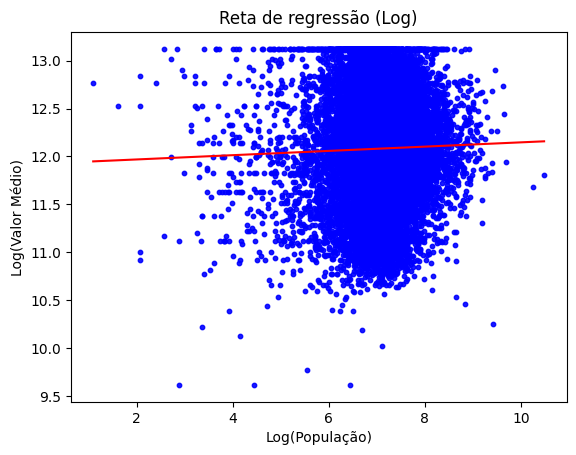

In [ ]:
X_plot_log = np.linspace(np.min(x_treino_population_log), np.max(x_treino_population_log))
plt.scatter(y=y_treino_population_log, x=x_treino_population_log, color='blue', s=10, alpha=0.9)
plt.plot(X_plot_log, X_plot_log*reg_linear_population_log.coef_[0] + reg_linear_population_log.intercept_[0], color='r')
plt.title('Reta de regressão (Log)')
plt.ylabel('Log(Valor Médio)')
plt.xlabel('Log(População)')
plt.show()

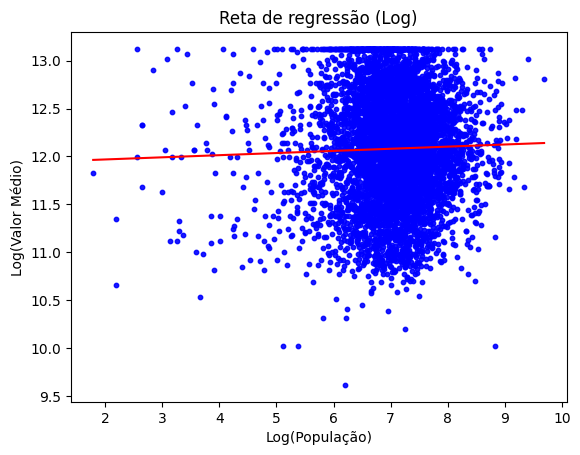

In [ ]:
X_plot_log = np.linspace(np.min(x_teste_population_log), np.max(x_teste_population_log))
plt.scatter(y=y_teste_population_log, x=x_teste_population_log, color='blue', s=10, alpha=0.9)
plt.plot(X_plot_log, X_plot_log*reg_linear_population_log.coef_[0] + reg_linear_population_log.intercept_[0], color='r')
plt.title('Reta de regressão (Log)')
plt.ylabel('Log(Valor Médio)')
plt.xlabel('Log(População)')
plt.show()

**Valor médio da casa (median_house_value) em função da posição latitudinal da casa (latitude) com dados transformados com logarítimo**

In [ ]:
x_latitude_log = df_log.loc[:,['latitude']].values
y_latitude_log = df_log.loc[:,['median_house_value_log']].values

In [ ]:
from sklearn.model_selection import train_test_split
x_treino_latitude_log, x_teste_latitude_log, y_treino_latitude_log, y_teste_latitude_log = train_test_split(x_latitude_log, y_latitude_log, test_size = 0.3, random_state = 7)

In [ ]:
from sklearn.linear_model import LinearRegression
reg_linear_latitude_log = LinearRegression()
reg_linear_latitude_log.fit(x_treino_latitude_log, y_treino_latitude_log)

LinearRegression()

In [ ]:
print("Coeficiente:", reg_linear_latitude_log.coef_)
print("Intercepto:", reg_linear_latitude_log.intercept_)

Coeficiente: [[-0.05061277]]
Intercepto: [13.88473677]


In [ ]:
print("Equação: Valor = {:.2f} + {:.2f} * Latitude".format(reg_linear_latitude_log.intercept_[0], reg_linear_latitude_log.coef_[0][0]))

Equação: Valor = 13.88 + -0.05 * Latitude


In [ ]:
print("Score no treino:", reg_linear_latitude_log.score(x_treino_latitude_log, y_treino_latitude_log))
print("Score no teste:", reg_linear_latitude_log.score(x_teste_latitude_log, y_teste_latitude_log))

Score no treino: 0.036267836055423164
Score no teste: 0.03849016678910455


In [ ]:
previsoes_teste_latitude_teste_log = reg_linear_latitude_log.predict(x_teste_latitude_log)

# Cálculo do RMSE na escala logarítmica (Latitude)
mse_latitude_log = mean_squared_error(y_teste_latitude_log, previsoes_teste_latitude_teste_log)
rmse_latitude_log = np.sqrt(mse_latitude_log)
print("RMSE (Regressão Linear - Latitude LOG - Escala Log):", rmse_latitude_log)

## Transformando previsões e valores reais de volta para a escala original
previsoes_finais_escala_original_latitude = np.exp(previsoes_teste_latitude_teste_log)
y_teste_escala_original_latitude =  np.exp(y_teste_latitude_log)

## Cálculo do RMSE na escala original
mse_escala_original_latitude = mean_squared_error(y_teste_escala_original_latitude, previsoes_finais_escala_original_latitude)
rmse_escala_original_latitude = np.sqrt(mse_escala_original_latitude)
print("RMSE (Regressão Linear - Latitude LOG - Escala Original):", rmse_escala_original_latitude)

RMSE (Regressão Linear - Latitude LOG - Escala Log): 0.5590901922543274
RMSE (Regressão Linear - Latitude LOG - Escala Original): 118614.58371561606


In [ ]:
plt.scatter(y=y_treino_latitude_log, x=x_treino_latitude_log, color='blue', s=10, alpha=0.9)
X_plot_latitude_log = np.linspace(np.min(x_treino_latitude_log), np.max(x_treino_latitude_log))
plt.plot(X_plot_latitude_log, X_plot_latitude_log*reg_linear_latitude_log.coef_[0] + reg_linear_latitude_log.intercept_[0], color='r')
plt.title('Reta de regressão (Treino - Log Latitude vs Log Valor Médio)')
plt.ylabel('Log(Valor Médio)')
plt.xlabel('Latitude')
plt.show()

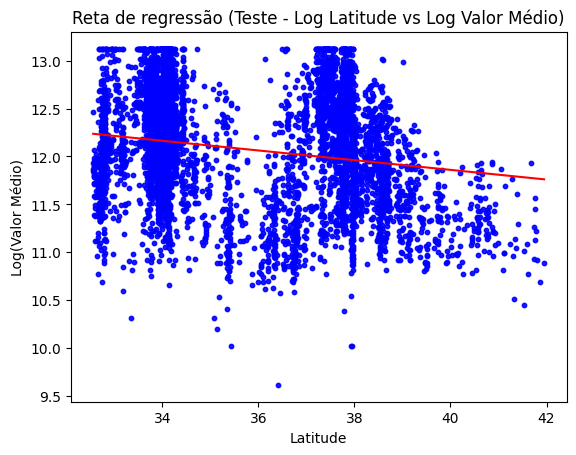

In [ ]:
plt.scatter(y=y_teste_latitude_log, x=x_teste_latitude_log, color='blue', s=10, alpha=0.9)
X_plot_latitude_log_test = np.linspace(np.min(x_teste_latitude_log), np.max(x_teste_latitude_log))
plt.plot(X_plot_latitude_log_test, X_plot_latitude_log_test*reg_linear_latitude_log.coef_[0] + reg_linear_latitude_log.intercept_[0], color='r')
plt.title('Reta de regressão (Teste - Log Latitude vs Log Valor Médio)')
plt.ylabel('Log(Valor Médio)')
plt.xlabel('Latitude')
plt.show()

## REGRESSÃO LINEAR MÚLTIPLA

**REGRESSÃO LINEAR MÚLTIPLA COM DADOS TRANSFORMADOS COM LOGARÍTIMO**

In [ ]:
x_multipla_log = df_log.drop('median_house_value_log', axis=1).values

y_multipla_log = df_log['median_house_value_log'].values

In [ ]:
from sklearn.model_selection import train_test_split

x_treino_multipla_log, x_teste_multipla_log, y_treino_multipla_log, y_teste_multipla_log = train_test_split(x_multipla_log, y_multipla_log, test_size=0.3, random_state=7)

In [ ]:
from sklearn.linear_model import LinearRegression

reg_multipla_log = LinearRegression()
reg_multipla_log.fit(x_treino_multipla_log, y_treino_multipla_log)

LinearRegression()

In [ ]:
print("Coeficientes:", reg_multipla_log.coef_)
print("Intercepto:", reg_multipla_log.intercept_)

Coeficientes: [-0.01787367 -0.29990023  0.43917532 -0.05773882 -0.0636626  -0.15818821
 -0.15768553  0.00234958  0.2609516  -0.12532138  0.29047909 -0.40804613
  0.72546951]
Intercepto: -1.5593160598467044


Equação: log(Valor Médio) = -1.56 + (-0.02) * latitude + (-0.30) * longitude + (0.44) * housing_median_age + (-0.06) * log(total_rooms) + (-0.06) * log(total_bedrooms) + (-0.16) * log(population) + (-0.16) * log(households) + (0.002) * log(median_income) + (0.26) * 1H_NEAR_BAY + (-0.13) * 1H_OCEAN + (0.29) * INLAND + (-0.41) * ISLAND + (0.73) * NEAR_OCEAN

In [ ]:
print("Score no treino:", reg_multipla_log.score(x_treino_multipla_log, y_treino_multipla_log))
print("Score no teste:", reg_multipla_log.score(x_teste_multipla_log, y_teste_multipla_log))

Score no treino: 0.6855813356075156
Score no teste: 0.6923703428555261


In [ ]:
previsoes_multipla_teste_log = reg_multipla_log.predict(x_teste_multipla_log)

# Cálculo do RMSE na escala logarítmica (Múltipla)
mse_multipla_log = mean_squared_error(y_teste_multipla_log, previsoes_multipla_teste_log)
rmse_multipla_log = np.sqrt(mse_multipla_log)
print("RMSE (Regressão Linear Múltipla LOG - Escala Log):", rmse_multipla_log)

## Transformando previsões e valores reais de volta para a escala original
previsoes_finais_escala_original_multipla = np.exp(previsoes_multipla_teste_log)
y_teste_escala_original_multipla =  np.exp(y_teste_multipla_log)

## Cálculo do RMSE na escala original
mse_escala_original_multipla = mean_squared_error(y_teste_escala_original_multipla, previsoes_finais_escala_original_multipla)
rmse_escala_original_multipla = np.sqrt(mse_escala_original_multipla)
print("RMSE (Regressão Linear Múltipla LOG - Escala Original):", rmse_escala_original_multipla)

RMSE (Regressão Linear Múltipla LOG - Escala Log): 0.31624168073077585
RMSE (Regressão Linear Múltipla LOG - Escala Original): 67060.30344598184


### Validação cruzada

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [ ]:
from sklearn.linear_model import LinearRegression
modelo_multipla_log = LinearRegression()
resultado = cross_val_score(modelo_multipla_log, x_multipla_log, y_multipla_log, cv = kfold)
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 68.69%


## REGRESSÃO POR VETORES DE SUPORTE

In [ ]:
df_log

ONEH_OCEAN  INLAND  ISLAND  NEAR_BAY  NEAR_OCEAN  longitude  latitude  \
0             0.0     0.0     0.0       1.0         0.0    -122.23     37.88   
1             0.0     0.0     0.0       1.0         0.0    -122.22     37.86   
2             0.0     0.0     0.0       1.0         0.0    -122.24     37.85   
3             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
4             0.0     0.0     0.0       1.0         0.0    -122.25     37.85   
...           ...     ...     ...       ...         ...        ...       ...   
20635         0.0     1.0     0.0       0.0         0.0    -121.09     39.48   
20636         0.0     1.0     0.0       0.0         0.0    -121.21     39.49   
20637         0.0     1.0     0.0       0.0         0.0    -121.22     39.43   
20638         0.0     1.0     0.0       0.0         0.0    -121.32     39.43   
20639         0.0     1.0     0.0       0.0         0.0    -121.24     39.37   

       housing_median_age  total_bedrooms_log  total_rooms_log  \
0                    41.0            4.859812         6.779922   
1                    21.0            7.008505         8.867709   
2                    52.0            5.247024         7.290975   
3                    52.0            5.459586         7.149917   
4                    52.0            5.634790         7.394493   
...                   ...                 ...              ...   
20635                25.0            5.924256         7.417580   
20636                18.0            5.010635         6.546785   
20637                17.0            6.184149         7.720462   
20638                18.0            6.013715         7.528332   
20639                16.0            6.423247         7.932003   

       households_log  population_log  median_income_log  \
0            4.836282        5.774552           2.119287   
1            7.037028        7.783641           2.116424   
2            5.176150        6.206576           1.982022   
3            5.389072        6.324359           1.730434   
4            5.556828        6.336826           1.347086   
...               ...             ...                ...   
20635        5.799093        6.739337           0.444878   
20636        4.736198        5.874931           0.938756   
20637        6.070738        6.914731           0.530628   
20638        5.855072        6.608001           0.624440   
20639        6.272877        7.234898           0.870707   

       median_house_value_log  
0                   13.022764  
1                   12.789684  
2                   12.771671  
3                   12.740517  
4                   12.743151  
...                       ...  
20635               11.265745  
20636               11.252859  
20637               11.432799  
20638               11.346871  
20639               11.400876  

[20640 rows x 14 columns]

In [ ]:
x_svm_log = df_log.iloc[:, 0:13].values

In [ ]:
y_svm_log = df_log.iloc[:, 13].values

In [ ]:
from sklearn.model_selection import train_test_split
x_treino_svm_log, x_teste_svm_log, y_treino_svm_log, y_teste_svm_log = train_test_split(x_svm_log, y_svm_log, test_size = 0.3, random_state = 7)

**Padronização de escala**

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler_log = StandardScaler()
x_treino_scaler_log = x_scaler_log.fit_transform(x_treino_svm_log)
x_teste_scaler_log = x_scaler_log.transform(x_teste_svm_log)

In [ ]:
y_scaler_log = StandardScaler()
y_treino_scaler_log = y_scaler_log.fit_transform(y_treino_svm_log.reshape(-1,1))
y_teste_scaler_log = y_scaler_log.transform(y_teste_svm_log.reshape(-1,1))

In [ ]:
from sklearn.svm import SVR
svr_reg_log = SVR(kernel='rbf')
svr_reg_log.fit(x_treino_scaler_log, y_treino_scaler_log.ravel())

SVR()

In [ ]:
print("Score no treino:", svr_reg_log.score(x_treino_scaler_log, y_treino_scaler_log))
print("Score no teste:", svr_reg_log.score(x_teste_scaler_log, y_teste_scaler_log))

Score no treino: 0.8036410764015751
Score no teste: 0.7868421119240702


In [ ]:
previsoes_teste_svr_log = svr_reg_log.predict(x_teste_scaler_log)
previsoes_teste_svr_log_inverse = y_scaler_log.inverse_transform(previsoes_teste_svr_log.reshape(-1,1))

In [ ]:
y_teste_inverse_log = y_scaler_log.inverse_transform(y_teste_scaler_log.reshape(-1,1))

In [ ]:
previsoes_teste_svr_log = svr_reg_log.predict(x_teste_scaler_log) # SVR usa dados escalados

# Cálculo do RMSE na escala logarítmica (SVR)
previsoes_teste_svr_log_inversescale = y_scaler_log.inverse_transform(previsoes_teste_svr_log.reshape(-1,1))
mse_svr_log = mean_squared_error(y_teste_svm_log, previsoes_teste_svr_log_inversescale) # Comparar com y_teste_svm_log (log original, não escalado)
rmse_svr_log = np.sqrt(mse_svr_log)
print("RMSE (SVR LOG - Escala Log):", rmse_svr_log)

## Transformando previsões e valores reais de volta para a escala original
previsoes_finais_escala_original_svr = np.exp(previsoes_teste_svr_log_inversescale)
y_teste_escala_original_svr =  np.exp(y_teste_svm_log)

## Cálculo do RMSE na escala original
mse_escala_original_svr = mean_squared_error(y_teste_escala_original_svr, previsoes_finais_escala_original_svr)
rmse_escala_original_svr = np.sqrt(mse_escala_original_svr)
print("RMSE (SVR LOG - Escala Original):", rmse_escala_original_svr)

RMSE (SVR LOG - Escala Log): 0.2630872379272667
RMSE (SVR LOG - Escala Original): 56203.57883133184


In [ ]:
from sklearn.preprocessing import StandardScaler
independente_scaler_log = x_scaler_log.fit_transform(x_svm_log)
dependente_scaler_log = y_scaler_log.fit_transform(y_svm_log.reshape(-1,1))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)
modelo_svr_log = SVR(kernel='rbf')
resultado = cross_val_score(modelo_svr_log, independente_scaler_log, dependente_scaler_log.ravel(), cv = kfold)
print("Coeficiente de Determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação médio: 78.93%


## REGRESSÃO COM ÁRVORE DE DECISÃO


In [ ]:
x_arvore_log = df_log.iloc[:, 0:13].values
y_arvore_log = df_log.iloc[:, 13].values

In [ ]:
from sklearn.model_selection import train_test_split
x_treino_arvore_log, x_teste_arvore_log, y_treino_arvore_log, y_teste_arvore_log = train_test_split(x_arvore_log, y_arvore_log, test_size = 0.3, random_state = 7)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
arvore_log = DecisionTreeRegressor(max_depth=9, random_state=7)
arvore_log.fit(x_treino_arvore_log, y_treino_arvore_log)

DecisionTreeRegressor(max_depth=9, random_state=7)

In [ ]:
print("Score no treino:", arvore_log.score(x_treino_arvore_log, y_treino_arvore_log))
print("Score no teste:", arvore_log.score(x_teste_arvore_log, y_teste_arvore_log))

Score no treino: 0.8226438458679735
Score no teste: 0.7382162852005268


In [ ]:
previsoes_arvore_teste_log = arvore_log.predict(x_teste_arvore_log)

# Cálculo do RMSE na escala logarítmica (Árvore de Decisão)
mse_arvore_log = mean_squared_error(y_teste_arvore_log, previsoes_arvore_teste_log)
rmse_arvore_log = np.sqrt(mse_arvore_log)
print("RMSE (Árvore de Decisão LOG - Escala Log):", rmse_arvore_log)

## Transformando previsões e valores reais de volta para a escala original
previsoes_finais_escala_original_arvore = np.exp(previsoes_arvore_teste_log)
y_teste_escala_original_arvore =  np.exp(y_teste_arvore_log)

## Cálculo do RMSE na escala original
mse_escala_original_arvore = mean_squared_error(y_teste_escala_original_arvore, previsoes_finais_escala_original_arvore)
rmse_escala_original_arvore = np.sqrt(mse_escala_original_arvore)
print("RMSE (Árvore de Decisão LOG - Escala Original):", rmse_escala_original_arvore)

RMSE (Árvore de Decisão LOG - Escala Log): 0.2917267957483075
RMSE (Árvore de Decisão LOG - Escala Original): 61990.819349392405


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

modelo_arvore_log_cv =  DecisionTreeRegressor(max_depth=8, random_state=7)
resultado_cv = cross_val_score(modelo_arvore_log_cv, x_arvore_log, y_arvore_log, cv = kfold)
print("Coeficiente de Determinação Médio (Validação Cruzada): %.2f%%" % (resultado_cv.mean() * 100.0))

Coeficiente de Determinação Médio (Validação Cruzada): 74.14%


## REGRESSÃO COM RANDOM FOREST

In [ ]:
x_randomf_log = df_log.iloc[:, 0:13].values
y_randomf_log = df_log.iloc[:, 13].values

In [ ]:
x_treino_randomf_log, x_teste_randomf_log, y_treino_randomf_log, y_teste_randomf_log = train_test_split(x_randomf_log, y_randomf_log, test_size = 0.3, random_state = 7)

In [ ]:
random_log = RandomForestRegressor(n_estimators=250, criterion='squared_error', max_depth=11, random_state = 7)
random_log.fit(x_treino_randomf_log, y_treino_randomf_log)

RandomForestRegressor(max_depth=11, n_estimators=250, random_state=7)

In [ ]:
print("Score no treino (Log):", random_log.score(x_treino_randomf_log, y_treino_randomf_log))
print("Score no teste (Log):", random_log.score(x_teste_randomf_log, y_teste_randomf_log))


Score no treino (Log): 0.8984341611503448
Score no teste (Log): 0.8113138156264106


In [ ]:
previsoes_teste_randomf_log = random_log.predict(x_teste_randomf_log)

# Cálculo do RMSE na escala logarítmica (Random Forest)
mse_randomf_log = mean_squared_error(y_teste_randomf_log, previsoes_teste_randomf_log)
rmse_randomf_log = np.sqrt(mse_randomf_log)
print("RMSE (Random Forest LOG - Escala Log):", rmse_randomf_log)

## Transformando previsões e valores reais de volta para a escala original
previsoes_finais_escala_original_randomf = np.exp(previsoes_teste_randomf_log)
y_teste_escala_original_randomf =  np.exp(y_teste_randomf_log)

## Cálculo do RMSE na escala original
mse_escala_original_randomf = mean_squared_error(y_teste_escala_original_randomf, previsoes_finais_escala_original_randomf)
rmse_escala_original_randomf = np.sqrt(mse_escala_original_randomf)
print("RMSE (Random Forest LOG - Escala Original):", rmse_escala_original_randomf)

RMSE (Random Forest LOG - Escala Log): 0.2476709442304977
RMSE (Random Forest LOG - Escala Original): 53617.64413082335


In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)
modelo_randomf_log =  RandomForestRegressor(n_estimators=200, criterion='squared_error', max_depth=9, random_state = 7)
resultado_log = cross_val_score(modelo_randomf_log, x_randomf_log, y_randomf_log, cv = kfold)
print("Coeficiente de Determinação Médio (RANDOM FOREST LOG): %.2f%%" % (resultado_log.mean() * 100.0))

Coeficiente de Determinação Médio (RANDOM FOREST LOG): 79.42%


## REGRESSÃO COM XGBOOST

In [ ]:
x_xg_log = df_log.iloc[:, 0:13].values
y_xg_log = df_log.iloc[:, 13].values

In [ ]:
x_treino_xg_log, x_teste_xg_log, y_treino_xg_log, y_teste_xg_log = train_test_split(x_xg_log, y_xg_log, test_size = 0.3, random_state = 7)

In [ ]:
xgboost_log = XGBRegressor(n_estimators=300, max_depth=7, learning_rate=0.05, objective="reg:squarederror", random_state=7)
xgboost_log.fit(x_treino_xg_log, y_treino_xg_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=7, ...)

In [ ]:
print("Score no treino (Log):", xgboost_log.score(x_treino_xg_log, y_treino_xg_log))
print("Score no teste (Log):", xgboost_log.score(x_teste_xg_log, y_teste_xg_log))

Score no treino (Log): 0.9444899202987416
Score no teste (Log): 0.8442413849898248


In [ ]:
previsoes_teste_xg_log = xgboost_log.predict(x_teste_xg_log)

# Cálculo do RMSE na escala logarítmica (XGBoost)
mse_xg_log = mean_squared_error(y_teste_xg_log, previsoes_teste_xg_log)
rmse_xg_log = np.sqrt(mse_xg_log)
print("RMSE (XGBoost LOG - Escala Log):", rmse_xg_log)

## Transformando previsões e valores reais de volta para a escala original
previsoes_finais_escala_original_xg = np.exp(previsoes_teste_xg_log)
y_teste_escala_original_xg =  np.exp(y_teste_xg_log)

## Cálculo do RMSE na escala original
mse_escala_original_xg = mean_squared_error(y_teste_escala_original_xg, previsoes_finais_escala_original_xg)
rmse_escala_original_xg = np.sqrt(mse_escala_original_xg)
print("RMSE (XGBoost LOG - Escala Original):", rmse_escala_original_xg)

RMSE (XGBoost LOG - Escala Log): 0.22502514342004667
RMSE (XGBoost LOG - Escala Original): 48525.79836111959


In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)
modelo_xg_log =  XGBRegressor(n_estimators=250, max_depth=7, learning_rate=0.05, objective="reg:squarederror", random_state=7)
resultado_log = cross_val_score(modelo_xg_log, x_xg_log, y_xg_log, cv = kfold)
print("Coeficiente de Determinação Médio (XGBOOST LOG): %.2f%%" % (resultado_log.mean() * 100.0))

Coeficiente de Determinação Médio (XGBOOST LOG): 84.68%


## REGRESSÃO COM LIGHT GBM


In [ ]:
x_lgbm_log = df_log.iloc[:, 0:13].values
y_lgbm_log = df_log.iloc[:, 13].values

In [ ]:
x_treino_lgbm_log, x_teste_lgbm_log, y_treino_lgbm_log, y_teste_lgbm_log = train_test_split(x_lgbm_log, y_lgbm_log, test_size = 0.3, random_state = 7)

In [ ]:
lgbm_log = lgb.LGBMRegressor(num_leaves=100, max_depth=8, learning_rate=0.1, n_estimators=100, random_state=7,verbose=-1)
lgbm_log.fit(x_treino_lgbm_log, y_treino_lgbm_log)

LGBMRegressor(max_depth=8, num_leaves=100, random_state=7, verbose=-1)

In [ ]:
print("Score no treino (Log):", lgbm_log.score(x_treino_lgbm_log, y_treino_lgbm_log))
print("Score no teste (Log):", lgbm_log.score(x_teste_lgbm_log, y_teste_lgbm_log))


Score no treino (Log): 0.9148159884628773
Score no teste (Log): 0.8437871329591778


In [ ]:
previsoes_teste_lgbm_log = lgbm_log.predict(x_teste_lgbm_log)

# Cálculo do RMSE na escala logarítmica (Light GBM)
mse_lgbm_log = mean_squared_error(y_teste_lgbm_log, previsoes_teste_lgbm_log)
rmse_lgbm_log = np.sqrt(mse_lgbm_log)
print("RMSE (Light GBM LOG - Escala Log):", rmse_lgbm_log)

## Transformando previsões e valores reais de volta para a escala original
previsoes_finais_escala_original_lgbm = np.exp(previsoes_teste_lgbm_log)
y_teste_escala_original_lgbm =  np.exp(y_teste_lgbm_log)

## Cálculo do RMSE na escala original
mse_escala_original_lgbm = mean_squared_error(y_teste_escala_original_lgbm, previsoes_finais_escala_original_lgbm)
rmse_escala_original_lgbm = np.sqrt(mse_escala_original_lgbm)
print("RMSE (Light GBM LOG - Escala Original):", rmse_escala_original_lgbm)

RMSE (Light GBM LOG - Escala Log): 0.2253530344646952
RMSE (Light GBM LOG - Escala Original): 48634.159079422585


In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)
modelo_lgbm_log =  lgb.LGBMRegressor(num_leaves=60, max_depth=9, learning_rate=0.1, n_estimators=100, random_state=7,verbose=-1)
resultado_log = cross_val_score(modelo_lgbm_log, x_lgbm_log, y_lgbm_log, cv = kfold)
print("Coeficiente de Determinação Médio (LIGHT GBM LOG): %.2f%%" % (resultado_log.mean() * 100.0))


Coeficiente de Determinação Médio (LIGHT GBM LOG): 84.63%


## REGRESSÃO COM CATBOOST

In [ ]:
x_catb_log = df_log.iloc[:, 0:13].values
y_catb_log = df_log.iloc[:, 13].values

In [ ]:
x_treino_catb_log, x_teste_catb_log, y_treino_catb_log, y_teste_catb_log = train_test_split(x_catb_log, y_catb_log, test_size = 0.3, random_state = 7)

In [ ]:
catboost_log = CatBoostRegressor (iterations=300, learning_rate=0.09, depth = 10, random_state = 7, verbose=False)
catboost_log.fit(x_treino_catb_log, y_treino_catb_log)

In [ ]:
print("Score no treino (Log):", catboost_log.score(x_treino_catb_log, y_treino_catb_log))
print("Score no teste (Log):", catboost_log.score(x_teste_catb_log, y_teste_catb_log))

Score no treino (Log): 0.9193260637523535
Score no teste (Log): 0.845707986943711


In [ ]:
previsoes_teste_catb_log = catboost_log.predict(x_teste_catb_log)

In [ ]:
previsoes_teste_catb_log = catboost_log.predict(x_teste_catb_log)

# Cálculo do RMSE na escala logarítmica
mse_catb_log = mean_squared_error(y_teste_catb_log, previsoes_teste_catb_log)
rmse_catb_log = np.sqrt(mse_catb_log)
print("RMSE (CATBOOST LOG - Escala Log):", rmse_catb_log)

## Transformando previsões e valores reais de volta para a escala original
previsoes_finais_escala_original = np.exp(previsoes_teste_catb_log)
y_teste_catb_escala_original =  np.exp(y_teste_catb_log)

## Cálculo do RMSE na escala original
mse_catb_escala_original = mean_squared_error(y_teste_catb_escala_original, previsoes_finais_escala_original)
rmse_catb_escala_original = np.sqrt(mse_catb_escala_original)
print("RMSE (CATBOOST LOG - Escala Original):", rmse_catb_escala_original)

RMSE (CATBOOST LOG - Escala Log): 0.2239632347243804
RMSE (CATBOOST LOG - Escala Original): 48555.91964035251


In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)
modelo_catb_log =  CatBoostRegressor (iterations=300, learning_rate=0.09, depth = 9, random_state = 7, verbose=False)
resultado_log = cross_val_score(modelo_catb_log, x_catb_log, y_catb_log, cv = kfold)
print("Coeficiente de Determinação Médio (CATBOOST LOG): %.2f%%" % (resultado_log.mean() * 100.0))

Coeficiente de Determinação Médio (CATBOOST LOG): 84.81%


## REGRESSÃO COM REDES NEURAIS

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
x_rn_log = df_log.iloc[:, 0:13].values
y_rn_log = df_log.iloc[:, 13].values

In [ ]:
x_treino_rn_log, x_teste_rn_log, y_treino_rn_log, y_teste_rn_log = train_test_split(x_rn_log, y_rn_log, test_size = 0.3, random_state = 7)

In [ ]:
x_scaler_rn_log = StandardScaler()
x_treino_rn_scaler_log = x_scaler_rn_log.fit_transform(x_treino_rn_log)
x_teste_rn_scaler_log = x_scaler_rn_log.transform(x_teste_rn_log)

In [ ]:
y_scaler_rn_log = StandardScaler()
y_treino_rn_scaler_log = y_scaler_rn_log.fit_transform(y_treino_rn_log.reshape(-1, 1))
y_teste_rn_scaler_log = y_scaler_rn_log.transform(y_teste_rn_log.reshape(-1, 1))

In [ ]:
reg_neural_log = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=7, verbose=False)
reg_neural_log.fit(x_treino_rn_scaler_log, y_treino_rn_scaler_log.ravel())

MLPRegressor(hidden_layer_sizes=(100, 50), random_state=7)

In [ ]:
print("Score no treino (Rede Neural com Log):", reg_neural_log.score(x_treino_rn_scaler_log, y_treino_rn_scaler_log))
print("Score no teste (Rede Neural com Log):", reg_neural_log.score(x_teste_rn_scaler_log, y_teste_rn_scaler_log))

Score no treino (Rede Neural com Log): 0.871456979430096
Score no teste (Rede Neural com Log): 0.8092494097553498


In [ ]:
previsoes_teste_rn_log = reg_neural_log.predict(x_teste_rn_scaler_log)

y_teste_rn_inverse_log = y_scaler_rn_log.inverse_transform(y_teste_rn_scaler_log.reshape(-1,1))
previsoes_rn_inverse_log = y_scaler_rn_log.inverse_transform(previsoes_teste_rn_log.reshape(-1, 1))

In [ ]:
previsoes_teste_rn_log = reg_neural_log.predict(x_teste_rn_scaler_log)

# Cálculo do RMSE na escala logarítmica (Redes Neurais)
previsoes_teste_rn_log_inversescale = y_scaler_rn_log.inverse_transform(previsoes_teste_rn_log.reshape(-1,1))
mse_rn_log = mean_squared_error(y_teste_rn_log, previsoes_teste_rn_log_inversescale)
rmse_rn_log = np.sqrt(mse_rn_log)
print("RMSE (Redes Neurais LOG - Escala Log):", rmse_rn_log)

## Transformando previsões e valores reais de volta para a escala original
previsoes_finais_escala_original_rn = np.exp(previsoes_teste_rn_log_inversescale)
y_teste_escala_original_rn =  np.exp(y_teste_rn_log)

## Cálculo do RMSE na escala original
mse_escala_original_rn = mean_squared_error(y_teste_escala_original_rn, previsoes_finais_escala_original_rn)
rmse_escala_original_rn = np.sqrt(mse_escala_original_rn)
print("RMSE (Redes Neurais LOG - Escala Original):", rmse_escala_original_rn)

RMSE (Redes Neurais LOG - Escala Log): 0.2490221360070825
RMSE (Redes Neurais LOG - Escala Original): 54673.17544474395


In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)
modelo_rn_log_cv = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=7, verbose=False)
resultado_rn_log_cv = cross_val_score(modelo_rn_log_cv, x_rn_log, y_rn_log, cv = kfold)
print("Coeficiente de Determinação Médio (Rede Neural com Log - Validação Cruzada): %.2f%%" % (resultado_rn_log_cv.mean() * 100.0))

Coeficiente de Determinação Médio (Rede Neural com Log - Validação Cruzada): 62.16%


# Resultados Finais

In [ ]:
import pandas as pd
resultados_originais = [
    {"Modelo": "Regressão Linear Simples (Population)", "Score Treino/Teste": "0%, 0%", "RMSE": 115566.47, "Validação Cruzada": "N/A"},
    {"Modelo": "Regressão Linear Simples (Latitude)", "Score Treino/Teste": "2%, 2%", "RMSE": 114380.97, "Validação Cruzada": "N/A"},
    {"Modelo": "Regressão Linear Múltipla", "Score Treino/Teste": "64.32%, 64.95%", "RMSE": 68420.36, "Validação Cruzada": "64.35%"},
    {"Modelo": "Regressão por Vetores de Suporte", "Score Treino/Teste": "76.56%, 75.43%", "RMSE": 57289.15, "Validação Cruzada": "75.82%"},
    {"Modelo": "Regressão com Árvore de Decisão", "Score Treino/Teste": "76.58%, 68.94%", "RMSE": 64410.91, "Validação Cruzada": "70.04%"},
    {"Modelo": "Regressão com Random Forest", "Score Treino/Teste": "83.50%, 76.68%", "RMSE": 55804.85, "Validação Cruzada": "77.66%"},
    {"Modelo": "Regressão com XGBoost", "Score Treino/Teste": "93.52%, 83.04%", "RMSE": 47585.61, "Validação Cruzada": "83.60%"},
    {"Modelo": "Regressão com Light GBM", "Score Treino/Teste": "89.69%, 82.61%", "RMSE": 48169.02, "Validação Cruzada": "83.22%"},
    {"Modelo": "Regressão com CatBoost", "Score Treino/Teste": "90.46%, 82.63%", "RMSE": 47108.39, "Validação Cruzada": "83.89%"},
    {"Modelo": "Regressão com Redes Neurais", "Score Treino/Teste": "85.54%, 80.04%", "RMSE": 51628.53, "Validação Cruzada": "64.35%"}
]

resultados_logaritmicos = [
    {"Modelo": "Regressão Linear Simples (Population - Log)", "Score Treino/Teste": "0%, 9%", "RMSE (Escala Log)": 0.5702, "RMSE (Escala Original)": 120089.30, "Validação Cruzada": "N/A"},
    {"Modelo": "Regressão Linear Simples (Latitude - Log)", "Score Treino/Teste": "3%, 3%", "RMSE (Escala Log)": 0.5591, "RMSE (Escala Original)": 118614.58, "Validação Cruzada": "N/A"},
    {"Modelo": "Regressão Linear Múltipla (Log)", "Score Treino/Teste": "68.55%, 69.23%", "RMSE (Escala Log)": 0.3162, "RMSE (Escala Original)": 67060.30, "Validação Cruzada": "68.69%"},
    {"Modelo": "Regressão por Vetores de Suporte (Log)", "Score Treino/Teste": "80.36%, 78.68%", "RMSE (Escala Log)": 0.2631, "RMSE (Escala Original)": 56203.58, "Validação Cruzada": "78.93%"},
    {"Modelo": "Regressão com Árvore de Decisão (Log)", "Score Treino/Teste": "82.26%, 73.82%", "RMSE (Escala Log)": 0.2917, "RMSE (Escala Original)": 61990.82, "Validação Cruzada": "74.14%"},
    {"Modelo": "Regressão com Random Forest (Log)", "Score Treino/Teste": "89.84%, 81.13%", "RMSE (Escala Log)": 0.2477, "RMSE (Escala Original)": 53617.64, "Validação Cruzada": "79.42%"},
    {"Modelo": "Regressão com XGBoost (Log)", "Score Treino/Teste": "94.44%, 84.42%", "RMSE (Escala Log)": 0.2250, "RMSE (Escala Original)": 48525.80, "Validação Cruzada": "84.68%"},
    {"Modelo": "Regressão com Light GBM (Log)", "Score Treino/Teste": "91.48%, 84.37%", "RMSE (Escala Log)": 0.2254, "RMSE (Escala Original)": 48634.16, "Validação Cruzada": "84.63%"},
    {"Modelo": "Regressão com CatBoost (Log)", "Score Treino/Teste": "91.93%, 84.57%", "RMSE (Escala Log)": 0.2240, "RMSE (Escala Original)": 48555.92, "Validação Cruzada": "84.81%"},
    {"Modelo": "Regressão com Redes Neurais (Log)", "Score Treino/Teste": "87.14%, 80.92%", "RMSE (Escala Log)": 0.2490, "RMSE (Escala Original)": 54673.18, "Validação Cruzada": "62.16%"}
]

In [ ]:
df_resultado_originais = pd.DataFrame(resultados_originais).sort_values(by='RMSE')
df_resultado_log = pd.DataFrame(resultados_logaritmicos).sort_values(by='RMSE (Escala Original)')

In [ ]:
print("## Resultados da Regressão (Modelos na Escala Original ou Lineares Simples) ##")
print(df_resultado_originais.to_string(index=False))
print("\n" + "="*100 + "\n")

print("## Resultados da Regressão (Modelos com Transformação Logarítmica) ##")
print(df_resultado_log.to_string(index=False))

## Resultados da Regressão (Modelos na Escala Original ou Lineares Simples) ##
                               Modelo Score Treino/Teste      RMSE Validação Cruzada
               Regressão com CatBoost     90.46%, 82.63%  47108.39            83.89%
                Regressão com XGBoost     93.52%, 83.04%  47585.61            83.60%
              Regressão com Light GBM     89.69%, 82.61%  48169.02            83.22%
          Regressão com Redes Neurais     85.54%, 80.04%  51628.53            64.35%
          Regressão com Random Forest     83.50%, 76.68%  55804.85            77.66%
     Regressão por Vetores de Suporte     76.56%, 75.43%  57289.15            75.82%
      Regressão com Árvore de Decisão     76.58%, 68.94%  64410.91            70.04%
            Regressão Linear Múltipla     64.32%, 64.95%  68420.36            64.35%
  Regressão Linear Simples (Latitude)             2%, 2% 114380.97               N/A
Regressão Linear Simples (Population)             0%, 0% 115566.47     